<a href="https://colab.research.google.com/github/sethkipsangmutuba/Distributed-Computing-Application/blob/main/Note1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note 1: Distributed Computing, An Introduction

## 1.1 Definitions

## 1.2 The History of Distributed Computing

## 1.3 Different Forms of Computing

### Monolithic Computing

### Distributed Computing

### Parallel Computing

### Protocols

### Cooperative Computing

## 1.4 The Strengths and Weaknesses of Distributed Computing

## 1.5 Basics of Operating Systems

### Computer Programs and Processes

### Concurrent Programming

## 1.6 Network Basics

### Network Architecture

### Network Architecture Protocols

### Connection-Oriented versus Connectionless Communication

### Network Resources

### Host Identification and Internet Protocol Addresses

### Identifying Processes with Protocol Ports

### Email Addresses

### URLs

## 1.7 Software Engineering Basics

### Procedural versus Object-Oriented Programming

### The Unified Modeling Language

### The Architecture of Distributed Applications

### Toolkits, Frameworks, and Components

## Summary


## 1.1 Definitions

### Monolithic Computing
Computation executed on a single central processing unit (CPU) handling all tasks locally.  
**Example:** legacy PBX or circuit-switching control in telecom.

### Distributed System
A networked collection of independent computing nodes that coordinate to perform tasks, without shared memory or execution space. Nodes communicate via message passing.  
**Example:** cellular base stations collaborating for handover management.

### Distributed Computing
Computation performed across multiple independent nodes in a distributed system, enabling parallel processing, scalability, and fault tolerance.  
**Example:** distributed signal processing in 5G/6G networks or real-time traffic routing across telecom cores.

### Request for Comments (RFCs)
Formalized specifications for protocols, standards, and procedures in networking and telecommunications, publicly archived and referenced.  
**Example:** RFC 791 for IP, RFC 793 for TCP.

### Network Service
A program running on a server that provides functionality to clients over a network.  
**Example:** DNS, DHCP, SIP servers in telecom networks.

### Network Application
Software that operates on networked nodes to provide end-user functionality.  
**Example:** VoIP clients, video conferencing apps, or cloud-based telecom management dashboards.


In [75]:
import threading
import queue
import time
import random

# ============================
# Monolithic Computing
# ============================

def monolithic_task():
    """All computation happens sequentially on a single CPU"""
    print("[Monolithic] Start processing tasks sequentially")
    tasks = ["Process Call A", "Process Call B", "Process Call C"]
    for task in tasks:
        print(f"[Monolithic] Executing: {task}")
        time.sleep(1)  # simulate computation
    print("[Monolithic] All tasks completed\n")


# ============================
# Distributed System (Node & Message Passing)
# ============================

class Node(threading.Thread):
    """Represents an independent computing node in a distributed system"""
    def __init__(self, node_id, inbox):
        super().__init__()
        self.node_id = node_id
        self.inbox = inbox

    def run(self):
        while True:
            try:
                message = self.inbox.get(timeout=5)
                print(f"[Node {self.node_id}] Received message: {message}")
                time.sleep(random.uniform(0.5, 1.5))  # simulate processing
                print(f"[Node {self.node_id}] Processed message: {message}")
            except queue.Empty:
                break


def distributed_system_demo():
    print("[Distributed System] Nodes collaborating via message passing")
    inboxes = [queue.Queue() for _ in range(3)]
    nodes = [Node(i, inboxes[i]) for i in range(3)]

    for node in nodes:
        node.start()

    # Simulate messages sent between nodes
    messages = ["Call Hand-off", "Update Routing Table", "Sync State"]
    for i, message in enumerate(messages):
        inboxes[i % 3].put(message)

    for node in nodes:
        node.join()
    print("[Distributed System] All nodes finished processing\n")


# ============================
# Distributed Computing (Parallel Processing)
# ============================

def compute_task(task_id):
    print(f"[Distributed Computing] Task {task_id} started")
    time.sleep(random.uniform(0.5, 1.5))  # simulate computation
    print(f"[Distributed Computing] Task {task_id} completed")
    return task_id * 2  # example computation result

def distributed_computing_demo():
    print("[Distributed Computing] Parallel computation across nodes")
    from concurrent.futures import ThreadPoolExecutor
    tasks = [1, 2, 3, 4, 5]
    results = []
    with ThreadPoolExecutor(max_workers=3) as executor:
        results = list(executor.map(compute_task, tasks))
    print(f"[Distributed Computing] Results: {results}\n")


# ============================
# Network Service & Application
# ============================

class DNSService:
    """Network Service example"""
    def resolve(self, hostname):
        print(f"[DNSService] Resolving {hostname}")
        ip = f"192.168.1.{random.randint(2, 254)}"
        print(f"[DNSService] {hostname} -> {ip}")
        return ip


class VoIPClient:
    """Network Application example"""
    def __init__(self, dns_service):
        self.dns_service = dns_service

    def make_call(self, callee):
        ip = self.dns_service.resolve(callee)
        print(f"[VoIPClient] Calling {callee} at {ip}...\n")


# ============================
# Main Demonstration
# ============================

if __name__ == "__main__":
    # Monolithic computation
    monolithic_task()

    # Distributed system
    distributed_system_demo()

    # Distributed computing
    distributed_computing_demo()

    # Network service and application
    dns = DNSService()
    voip = VoIPClient(dns)
    voip.make_call("alice.example.com")
    voip.make_call("bob.example.com")


[Monolithic] Start processing tasks sequentially
[Monolithic] Executing: Process Call A
[Monolithic] Executing: Process Call B
[Monolithic] Executing: Process Call C
[Monolithic] All tasks completed

[Distributed System] Nodes collaborating via message passing
[Node 0] Received message: Call Hand-off
[Node 1] Received message: Update Routing Table
[Node 2] Received message: Sync State
[Node 0] Processed message: Call Hand-off
[Node 1] Processed message: Update Routing Table
[Node 2] Processed message: Sync State
[Distributed System] All nodes finished processing

[Distributed Computing] Parallel computation across nodes
[Distributed Computing] Task 1 started
[Distributed Computing] Task 2 started
[Distributed Computing] Task 3 started
[Distributed Computing] Task 3 completed
[Distributed Computing] Task 4 started
[Distributed Computing] Task 2 completed
[Distributed Computing] Task 5 started
[Distributed Computing] Task 4 completed
[Distributed Computing] Task 1 completed
[Distributed 

## 1.2 History of Distributed Computing

| Year / Era | Milestone | Telecom Relevance / Example |
|-------------|------------|------------------------------|
| **1960s** | Stand-alone computers | Early telephone exchanges operated on single CPU systems (monolithic computing) |
| **Late 1960s – Early 1970s** | Rudimentary networking; ARPANET initiated | Early packet-switched networks prototype for inter-office telecom communication |
| **1971** | Automated file transfer protocols (RFC 114, RFC 141) | Basis for data transfer in distributed network services and telecom billing |
| **1972** | First email application on ARPANET | First network application enabling cross-node communication; precursor to messaging services |
| **1980s** | TCP/IP standardization; NSFNET expansion | Fundamental protocols for global telecom networks; enabled scalable routing and internetworking |
| **Late 1980s** | World Wide Web (WWW) introduced | Network services and applications over distributed systems; example: web portals for telecom OSS/BSS |
| **1990s** | Internet commercial expansion | Growth of backbone networks, distributed hosting, and web-based telecom applications |
| **2000s** | Grid and cloud computing | Distributed computation for telecom data centers, virtualization, and core network orchestration |
| **2010s** | Mobile, edge, and fog computing | Base stations and edge nodes performing local processing; 4G/5G network intelligence |
| **2020s** | Federated learning, 5G/6G, IoT scaling | Distributed AI for traffic management, network slicing, and real-time service delivery |

### Takeaway
The evolution of distributed computing in telecommunications shows a clear trend:  
from **centralized monolithic systems → networked nodes → intelligent distributed infrastructures**,  
supporting **scalable, fault-tolerant, and real-time network services**.


## 1.3 Different Forms of Computing

### a) Monolithic Computing

**Definition:**  
Computing performed on a single, standalone computer without network connectivity. All computation, storage, and I/O occur locally.

---

### Single-User Monolithic Computing
One user executes applications on the system using only locally available resources.  
**Example in telecom:** early PC-based network configuration tools or local switch management applications.

---

### Multi-User Monolithic Computing
Multiple users share the resources of a centralized mainframe via time-sharing. Terminals connect users (possibly geographically dispersed) to the mainframe.  
**Examples:** IBM 360 series or Univac 1100 series.

---

### Telecom Applications
- Payroll or billing computations in centralized telecom offices.  
- Network planning or capacity analysis performed on a single mainframe.  
- Local control of circuit-switched telephone exchanges before distributed switching architectures.

---

### Key Characteristics
- Centralized resource management.  
- Users interact sequentially or via time-sharing.  
- Limited scalability beyond the mainframe capacity.  
- No inherent fault tolerance or distributed processing.


In [76]:
import threading
import time

# ============================
# Single-User Monolithic Computing
# ============================

def single_user_task():
    """
    Single user executing telecom tasks sequentially
    on a standalone system.
    """
    print("[Single-User Monolithic] Start processing local tasks")
    tasks = ["Configure Local Switch", "Generate Network Report", "Compute Billing"]
    for task in tasks:
        print(f"[Single-User Monolithic] Executing: {task}")
        time.sleep(1)  # simulate computation
    print("[Single-User Monolithic] All tasks completed\n")


# ============================
# Multi-User Monolithic Computing
# ============================

class Mainframe:
    """
    Represents a centralized mainframe executing tasks
    from multiple users via sequential time-sharing.
    """
    def __init__(self):
        self.lock = threading.Lock()  # sequential access

    def execute_task(self, user_id, task):
        with self.lock:
            print(f"[Mainframe] User {user_id} executing task: {task}")
            time.sleep(1)  # simulate computation
            print(f"[Mainframe] User {user_id} completed task: {task}")


def multi_user_demo():
    """
    Multiple users submit tasks to the centralized mainframe.
    Access is sequential (time-sharing simulation).
    """
    mainframe = Mainframe()
    user_tasks = {
        "Alice": ["Payroll Calculation", "Billing Update"],
        "Bob": ["Network Planning", "Capacity Analysis"],
        "Charlie": ["Switch Control", "Traffic Report"]
    }

    threads = []
    for user, tasks in user_tasks.items():
        for task in tasks:
            t = threading.Thread(target=mainframe.execute_task, args=(user, task))
            threads.append(t)
            t.start()

    for t in threads:
        t.join()
    print("[Multi-User Monolithic] All users finished tasks\n")


# ============================
# Main Demonstration
# ============================

if __name__ == "__main__":
    print("=== Monolithic Computing Demo ===\n")

    # Single-user monolithic computing
    single_user_task()

    # Multi-user monolithic computing
    multi_user_demo()


=== Monolithic Computing Demo ===

[Single-User Monolithic] Start processing local tasks
[Single-User Monolithic] Executing: Configure Local Switch
[Single-User Monolithic] Executing: Generate Network Report
[Single-User Monolithic] Executing: Compute Billing
[Single-User Monolithic] All tasks completed

[Mainframe] User Alice executing task: Payroll Calculation
[Mainframe] User Alice completed task: Payroll Calculation
[Mainframe] User Alice executing task: Billing Update
[Mainframe] User Alice completed task: Billing Update
[Mainframe] User Bob executing task: Network Planning
[Mainframe] User Bob completed task: Network Planning
[Mainframe] User Bob executing task: Capacity Analysis
[Mainframe] User Bob completed task: Capacity Analysis
[Mainframe] User Charlie executing task: Switch Control
[Mainframe] User Charlie completed task: Switch Control
[Mainframe] User Charlie executing task: Traffic Report
[Mainframe] User Charlie completed task: Traffic Report
[Multi-User Monolithic] Al

### b) Distributed Computing

**Definition:**  
Computing performed across multiple network-connected computers, each with its own processor and resources. Users can access both local and remote resources through communication between nodes.

**Example in Telecom:**  
A network engineer using a workstation can access local tools while querying remote servers for network traffic data or configuration information.

---

### Applications
- The World Wide Web, where a browser on a local system interacts with remote web servers to fetch content.  
- Distributed network management tools in telecom, enabling real-time monitoring and configuration of switches, routers, and base stations.  
- Load balancing and resource sharing across multiple servers in a telecom data center.

---

### Key Characteristics
- Nodes operate independently but coordinate through network communication.  
- Resource sharing and task distribution enhance scalability.  
- Fault-tolerant: individual node failures do not halt overall system operation.  
- Requires reliable communication protocols and synchronization mechanisms.


In [77]:
import threading
import queue
import time
import random

# ============================
# Distributed Node
# ============================

class Node(threading.Thread):
    """Represents an independent computing node in a distributed system"""
    def __init__(self, node_id, inbox, shared_data):
        super().__init__()
        self.node_id = node_id
        self.inbox = inbox
        self.shared_data = shared_data  # shared data for coordination
        self.running = True

    def run(self):
        while self.running:
            try:
                task = self.inbox.get(timeout=5)  # wait for a task
                print(f"[Node {self.node_id}] Received task: {task}")
                time.sleep(random.uniform(0.5, 1.5))  # simulate computation
                result = f"{task}-processed-by-Node{self.node_id}"
                self.shared_data.append(result)
                print(f"[Node {self.node_id}] Completed task: {task}")
            except queue.Empty:
                self.running = False


# ============================
# Distributed Computing Demo
# ============================

def distributed_computing_demo():
    print("[Distributed Computing] Starting simulation across multiple nodes\n")

    # Shared queue for tasks and shared list for results
    task_queue = queue.Queue()
    shared_results = []

    # Example telecom tasks
    tasks = [
        "Fetch Switch Configuration",
        "Monitor Base Station Traffic",
        "Update Routing Tables",
        "Analyze Call Logs",
        "Compute Bandwidth Usage"
    ]

    # Put tasks into the queue
    for task in tasks:
        task_queue.put(task)

    # Create multiple nodes
    nodes = [Node(node_id=i, inbox=task_queue, shared_data=shared_results) for i in range(3)]

    # Start all nodes
    for node in nodes:
        node.start()

    # Wait for all nodes to complete
    for node in nodes:
        node.join()

    print("\n[Distributed Computing] All tasks completed")
    print(f"[Distributed Computing] Aggregated Results: {shared_results}\n")


# ============================
# Main Demonstration
# ============================

if __name__ == "__main__":
    distributed_computing_demo()


[Distributed Computing] Starting simulation across multiple nodes

[Node 0] Received task: Fetch Switch Configuration
[Node 1] Received task: Monitor Base Station Traffic
[Node 2] Received task: Update Routing Tables
[Node 1] Completed task: Monitor Base Station Traffic
[Node 1] Received task: Analyze Call Logs
[Node 0] Completed task: Fetch Switch Configuration
[Node 0] Received task: Compute Bandwidth Usage
[Node 2] Completed task: Update Routing Tables
[Node 1] Completed task: Analyze Call Logs
[Node 0] Completed task: Compute Bandwidth Usage

[Distributed Computing] All tasks completed
[Distributed Computing] Aggregated Results: ['Monitor Base Station Traffic-processed-by-Node1', 'Fetch Switch Configuration-processed-by-Node0', 'Update Routing Tables-processed-by-Node2', 'Analyze Call Logs-processed-by-Node1', 'Compute Bandwidth Usage-processed-by-Node0']



### c) Parallel Computing

**Definition:**  
Computing in which multiple processors execute a single program simultaneously. Each processor works on different parts of the program to reduce execution time.

---

### Telecom Examples
- High-performance signal processing in baseband units of cellular networks.  
- Real-time network simulation for traffic engineering or capacity planning.  
- Large-scale data analytics in telecom data centers, such as subscriber behavior modeling.

---

### Key Characteristics
- Typically performed on a single multi-CPU system, but can be extended to networked computers using distributed processing software.  
- Enables solutions to computation-intensive tasks that are impractical on a single processor.  
- Requires careful partitioning of tasks to avoid interference and ensure efficient execution.  
- Common in scientific computing, with emerging applications in telecom for real-time analytics and network optimization.


In [78]:
import time
import random
from concurrent.futures import ThreadPoolExecutor, as_completed

# ============================
# Parallel Computing Task
# ============================

def signal_processing_task(task_id):
    """
    Simulates a computation-intensive telecom task,
    e.g., processing a portion of baseband signals.
    """
    print(f"[Parallel Computing] Task {task_id} started")
    # Simulate heavy computation
    time.sleep(random.uniform(0.5, 1.5))
    result = task_id ** 2  # example computation
    print(f"[Parallel Computing] Task {task_id} completed with result {result}")
    return result


# ============================
# Parallel Computing Demo
# ============================

def parallel_computing_demo():
    print("[Parallel Computing] Starting parallel computation across processors\n")

    tasks = list(range(1, 11))  # 10 computation-intensive tasks
    results = []

    # Using ThreadPoolExecutor to simulate multiple processors
    with ThreadPoolExecutor(max_workers=4) as executor:  # 4 processors
        future_to_task = {executor.submit(signal_processing_task, t): t for t in tasks}

        for future in as_completed(future_to_task):
            task_id = future_to_task[future]
            try:
                result = future.result()
                results.append(result)
            except Exception as e:
                print(f"[Parallel Computing] Task {task_id} generated an exception: {e}")

    print("\n[Parallel Computing] All tasks completed")
    print(f"[Parallel Computing] Aggregated Results: {results}\n")


# ============================
# Main Demonstration
# ============================

if __name__ == "__main__":
    parallel_computing_demo()


[Parallel Computing] Starting parallel computation across processors

[Parallel Computing] Task 1 started
[Parallel Computing] Task 2 started
[Parallel Computing] Task 3 started
[Parallel Computing] Task 4 started
[Parallel Computing] Task 3 completed with result 9
[Parallel Computing] Task 5 started
[Parallel Computing] Task 1 completed with result 1
[Parallel Computing] Task 6 started
[Parallel Computing] Task 2 completed with result 4
[Parallel Computing] Task 7 started
[Parallel Computing] Task 4 completed with result 16
[Parallel Computing] Task 8 started
[Parallel Computing] Task 5 completed with result 25
[Parallel Computing] Task 9 started
[Parallel Computing] Task 7 completed with result 49
[Parallel Computing] Task 10 started
[Parallel Computing] Task 8 completed with result 64
[Parallel Computing] Task 6 completed with result 36
[Parallel Computing] Task 9 completed with result 81
[Parallel Computing] Task 10 completed with result 100

[Parallel Computing] All tasks complete

### d) Cooperative Computing

**Definition:**  
A form of distributed computing in which multiple computers, often geographically dispersed, collaborate to perform large-scale computations by sharing idle resources.

---

### Telecom Examples
- Distributed processing for network traffic analysis using surplus CPU cycles across networked workstations.  
- Collaborative simulation of telecom network performance or optimization of routing algorithms.  
- Edge devices contributing computing power for real-time analytics in 5G/6G networks.

---

### Key Characteristics
- Utilizes underused resources across multiple systems.  
- Tasks are subdivided and assigned to participating nodes for parallel execution.  
- Enables large-scale computation without dedicated supercomputing infrastructure.  
- Coordination relies on middleware and scheduling software to manage distributed workloads.


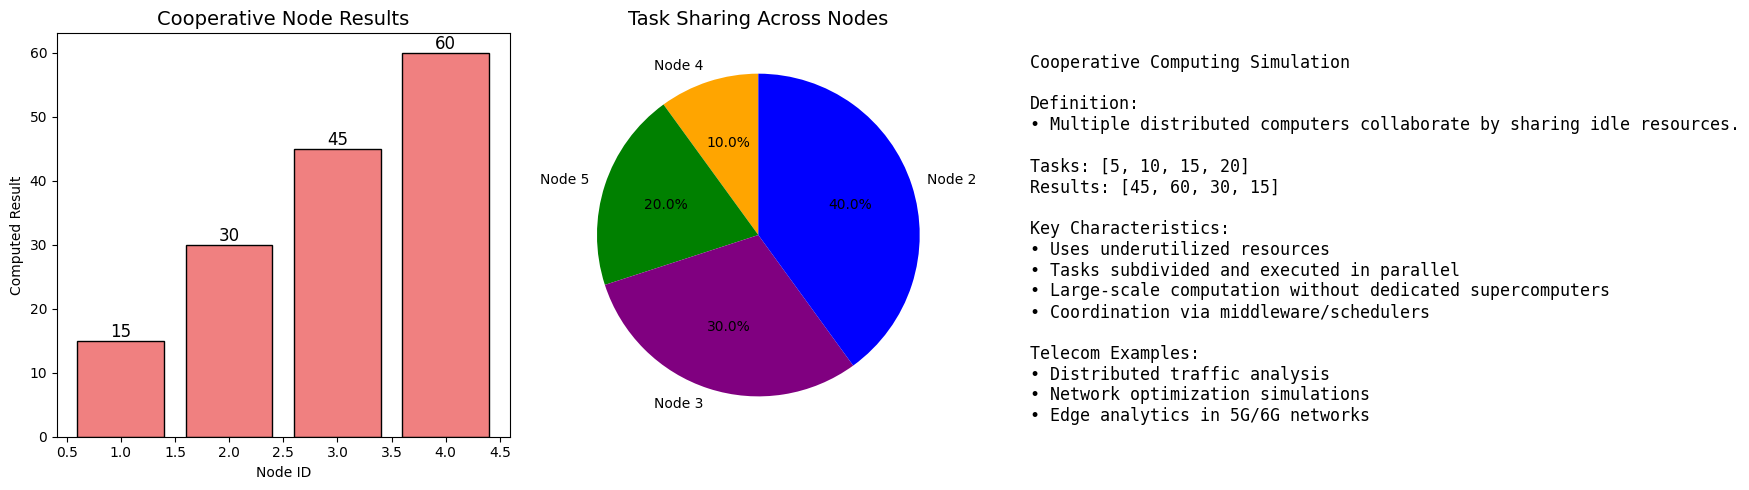

In [79]:
# Example: Cooperative Computing Simulation
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# --- Step 1: Define task function for cooperative nodes ---
def cooperative_task(node_id, task_data, return_dict):
    # Simulate variable processing times like distributed nodes
    time.sleep(random.uniform(0.5, 1.5))
    result = task_data * 3  # example computation
    return_dict[node_id] = result

# --- Step 2: Define tasks and nodes ---
tasks = [5, 10, 15, 20]  # tasks to be shared
manager = multiprocessing.Manager()
return_dict = manager.dict()
processes = []

# Assign tasks to nodes (simulating distributed workstations)
for i, task in enumerate(tasks):
    p = multiprocessing.Process(target=cooperative_task, args=(i+1, task, return_dict))
    processes.append(p)
    p.start()

for p in processes:
    p.join()

# --- Step 3: Prepare data for visualization ---
node_ids = list(return_dict.keys())
results = list(return_dict.values())

# --- Step 4: Create 3-panel visualization ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: Node results (bar chart)
axes[0].bar(node_ids, results, color='lightcoral', edgecolor='black')
axes[0].set_title('Cooperative Node Results', fontsize=14)
axes[0].set_xlabel('Node ID')
axes[0].set_ylabel('Computed Result')
for i, v in zip(node_ids, results):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Panel 2: Task assignment visualization
axes[1].pie(tasks, labels=[f'Node {i+1}' for i in node_ids], autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'purple', 'blue'])
axes[1].set_title('Task Sharing Across Nodes', fontsize=14)

# Panel 3:Summary
axes[2].axis('off')
summary_text = (
    f"Cooperative Computing Simulation\n\n"
    f"Definition:\n"
    f"• Multiple distributed computers collaborate by sharing idle resources.\n\n"
    f"Tasks: {tasks}\n"
    f"Results: {results}\n\n"
    f"Key Characteristics:\n"
    f"• Uses underutilized resources\n"
    f"• Tasks subdivided and executed in parallel\n"
    f"• Large-scale computation without dedicated supercomputers\n"
    f"• Coordination via middleware/schedulers\n\n"
    f"Telecom Examples:\n"
    f"• Distributed traffic analysis\n"
    f"• Network optimization simulations\n"
    f"• Edge analytics in 5G/6G networks\n"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=12, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


## 1.4 The Strengths and Weaknesses of Distributed Computing

### Overview
Distributed computing has become increasingly important since the 1980s, surpassing monolithic computing in scalability and applicability, particularly in telecom and networked systems.

---

### Strengths

- **Affordability and Connectivity:**  
  Modern PCs and network access are cost-effective and widely available, creating large-scale communities for distributed computation.

- **Resource Sharing:**  
  Organizations can maintain local resources while sharing computational and data resources over networks.  
  **Example in telecom:** distributed access to subscriber databases, routing tables, or network analytics.

- **Scalability:**  
  Systems can grow by adding nodes.  
  **Example:** increasing email servers or load-balanced telecom services to handle higher demand.

- **Fault Tolerance:**  
  Data and services can be replicated across multiple nodes, maintaining availability even if some nodes fail.  
  **Example:** mirrored subscriber databases across telecom data centers.

---

### Weaknesses

- **Multiple Points of Failure:**  
  More nodes and network links increase the risk of failures impacting overall system reliability.  
  **Example:** failure of a base station or core router affecting connected users.

- **Security Concerns:**  
  Decentralized management exposes systems to unauthorized access, malware, and network attacks.  
  **Example:** worms, viruses, or unauthorized access affecting telecom networks.  
  Security requires encryption, authentication, digital signatures, and access control mechanisms.

---

### Takeaway
Distributed computing offers significant benefits for scalability, resource sharing, and fault tolerance in telecom and networked applications,  
but it introduces complexity in reliability and security that must be carefully managed.


## 1.5 Basics of Operating Systems

Distributed computing involves programs running on multiple computers. Understanding how programs are executed and managed is essential for designing reliable distributed systems.

---

### Computer Programs and Processes

**Program:**  
A software artifact created by a developer using a high-level language, such as Python, which is interpreted or compiled for execution.

**Process:**  
A dynamic entity representing a program in execution. A process includes:  
- The program code being executed  
- Current variable values and execution state  
- Resources allocated by the operating system (CPU, memory, I/O)

---

### Process Lifecycle
- **Ready:** The program is queued for execution by the OS.  
- **Running:** CPU resources are allocated and instructions are executed.  
- **Blocked/Waiting:** The process waits for an event, such as I/O completion.  
- **Termination:** Execution is complete, and resources are released.  

Processes repeatedly cycle through **ready → running → blocked** until termination.

---

### Types of Python Programs in Distributed Systems

- **Applications:** Stand-alone Python programs executed locally on a machine.  
  **Example in telecom:** local network management or billing scripts.  

- **Server/Framework Programs:** Python programs executed on web servers or frameworks.  
  **Example:** distributed dashboards, subscriber query services, or network monitoring applications.  

**Execution:** Python programs are interpreted at runtime. The operating system manages resources and process state transitions as described above.

---

### Telecom Context
- Stand-alone applications run locally for network configuration, testing, or analytics.  
- Server-based programs provide remote access to distributed services and dashboards.  

Understanding program execution and process management is critical for designing scalable, reliable, and fault-tolerant telecom systems.


In [80]:
import time
import threading
import random

# Simulate a program
class Program:
    def __init__(self, name):
        self.name = name

    def execute(self):
        # Simulate some computation
        print(f"[{self.name}] Program execution started.")
        for i in range(3):
            print(f"[{self.name}] Executing step {i+1}...")
            time.sleep(random.uniform(0.5, 1.5))
        print(f"[{self.name}] Program execution finished.")


# Simulate a process
class Process(threading.Thread):
    def __init__(self, program, pid):
        super().__init__()
        self.program = program
        self.pid = pid
        self.state = "Ready"  # Initial state

    def run(self):
        self.transition("Running")
        self.program.execute()
        self.transition("Terminated")

    def transition(self, new_state):
        print(f"Process {self.pid}: {self.state} → {new_state}")
        self.state = new_state
        # Simulate waiting/blocking randomly
        if new_state == "Running" and random.random() > 0.7:
            self.transition("Blocked")
            time.sleep(random.uniform(0.5, 1.5))
            self.transition("Running")


# Simulate multiple processes in a distributed system
def simulate_distributed_system():
    programs = [Program(f"App{i}") for i in range(3)]
    processes = [Process(program, pid=i) for i, program in enumerate(programs)]

    print("Starting distributed system simulation...\n")
    for p in processes:
        p.start()

    for p in processes:
        p.join()

    print("\nAll processes have terminated.")


if __name__ == "__main__":
    simulate_distributed_system()


Starting distributed system simulation...

Process 0: Ready → Running
[App0] Program execution started.
[App0] Executing step 1...
Process 1: Ready → Running
[App1] Program execution started.
[App1] Executing step 1...
Process 2: Ready → Running
[App2] Program execution started.
[App2] Executing step 1...
[App2] Executing step 2...
[App1] Executing step 2...
[App0] Executing step 2...
[App2] Executing step 3...
[App1] Executing step 3...
[App0] Executing step 3...
[App1] Program execution finished.
Process 1: Running → Terminated
[App2] Program execution finished.
Process 2: Running → Terminated
[App0] Program execution finished.
Process 0: Running → Terminated

All processes have terminated.


### Concurrent Programming

**Definition:**  
Concurrent programming allows multiple processes or threads to execute simultaneously, potentially interacting or sharing resources. It is a key concept in distributed and multi-core systems.

---

### Process vs. Thread
- **Process:** An independent execution unit with its own memory space.  
- **Thread:** A lightweight execution unit within a process that shares memory with other threads. Threads allow finer-grained concurrency without duplicating all resources.

---

### Concurrency in Python
Python supports concurrency through mechanisms such as **threading**, **multiprocessing**, and **asynchronous programming**.  
In distributed systems, concurrency enables tasks like handling multiple network requests, processing data streams, or performing parallel computations.

---

### Telecom Examples
- Multiple network monitoring tasks running concurrently on a telecom server.  
- Handling simultaneous subscriber requests in a distributed billing system.  
- Real-time processing of call detail records (CDRs) across multiple nodes.

---

### Key Considerations
- Proper synchronization is required to prevent race conditions and ensure data consistency.  
- Deadlocks, starvation, and resource contention are challenges in concurrent systems.  
- Concurrency increases efficiency and responsiveness but requires careful design to maintain correctness.

---

### Takeaway
Understanding concurrent programming and process/thread management is essential for designing **scalable, responsive, and reliable distributed telecom applications** that make effective use of multiple CPUs or networked nodes.


In [81]:
import threading
import multiprocessing
import time
import random

# ---------------------------
# Thread Example (Shared Memory)
# ---------------------------
class NetworkMonitorThread(threading.Thread):
    def __init__(self, task_id, shared_log, lock):
        super().__init__()
        self.task_id = task_id
        self.shared_log = shared_log
        self.lock = lock

    def run(self):
        for i in range(3):
            time.sleep(random.uniform(0.5, 1.5))
            # Synchronize access to shared resource
            with self.lock:
                self.shared_log.append(f"Thread {self.task_id} checked network node {i}")
                print(f"[Thread {self.task_id}] Logged network check {i}")


# ---------------------------
# Process Example (Separate Memory)
# ---------------------------
def network_monitor_process(process_id, log_queue):
    for i in range(3):
        time.sleep(random.uniform(0.5, 1.5))
        msg = f"Process {process_id} processed network node {i}"
        log_queue.put(msg)
        print(f"[Process {process_id}] {msg}")


# ---------------------------
# Simulation of concurrent telecom tasks
# ---------------------------
def simulate_concurrent_telecom_tasks():
    print("\n--- Thread-based Concurrent Network Monitoring ---")
    shared_log = []
    lock = threading.Lock()
    threads = [NetworkMonitorThread(i, shared_log, lock) for i in range(3)]

    for t in threads:
        t.start()
    for t in threads:
        t.join()

    print("\nShared Log from Threads:", shared_log)

    print("\n--- Process-based Concurrent Network Monitoring ---")
    log_queue = multiprocessing.Queue()
    processes = [multiprocessing.Process(target=network_monitor_process, args=(i, log_queue)) for i in range(3)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    # Collect logs from processes
    process_logs = []
    while not log_queue.empty():
        process_logs.append(log_queue.get())

    print("\nCollected Logs from Processes:", process_logs)


if __name__ == "__main__":
    simulate_concurrent_telecom_tasks()



--- Thread-based Concurrent Network Monitoring ---
[Thread 0] Logged network check 0
[Thread 2] Logged network check 0
[Thread 1] Logged network check 0
[Thread 2] Logged network check 1
[Thread 0] Logged network check 1
[Thread 1] Logged network check 1
[Thread 2] Logged network check 2
[Thread 0] Logged network check 2
[Thread 1] Logged network check 2

Shared Log from Threads: ['Thread 0 checked network node 0', 'Thread 2 checked network node 0', 'Thread 1 checked network node 0', 'Thread 2 checked network node 1', 'Thread 0 checked network node 1', 'Thread 1 checked network node 1', 'Thread 2 checked network node 2', 'Thread 0 checked network node 2', 'Thread 1 checked network node 2']

--- Process-based Concurrent Network Monitoring ---
[Process 0] Process 0 processed network node 0
[Process 1] Process 1 processed network node 0
[Process 2] Process 2 processed network node 0
[Process 0] Process 0 processed network node 1
[Process 1] Process 1 processed network node 1
[Process 2] 

###a) Protocols

**Definition:**  
A protocol is a formal set of rules that defines how computers communicate over a network. It specifies how data is encoded, transmitted, and interpreted, and how events (sending, receiving) are coordinated.

---

### Key Principles
- **Encoding:** How data is formatted for transmission.  
- **Synchronization:** How send and receive operations are ordered to ensure correct communication.  
- **Coordination:** How participants manage communication without conflicts or errors.

---

### Distinction Between Protocol and Implementation
A protocol defines what rules must be followed, not how they are implemented.  

**Example:** HTTP specifies communication rules between a web browser and web server. Different browsers or server software may implement these rules differently, but all conform to the same protocol.

---

### Telecom Context
- Signaling protocols in telecom networks (e.g., SIP, SS7) define how switches and endpoints communicate.  
- Data protocols (e.g., TCP/IP, UDP) ensure reliable or fast delivery of messages between network nodes.  
- Network management protocols (e.g., SNMP) standardize monitoring and control of distributed telecom devices.

**Analogy:**  
Just as a sport has rules (e.g., basketball) enforced by an authority but implemented by teams and players, a network protocol defines communication rules that each system implements in its own way.

---

### Takeaway
Understanding protocols is essential for designing distributed telecom systems that communicate reliably and efficiently, regardless of the underlying software or hardware implementations.


In [82]:
import threading
import queue
import time
import random

# ---------------------------
# Define a simple protocol
# ---------------------------
class SimpleProtocol:
    """
    Protocol rules:
    1. Messages must start with "MSG:"
    2. Receiver must acknowledge each message with "ACK"
    3. Sender retries if ACK not received within timeout
    """
    @staticmethod
    def encode_message(content):
        return f"MSG:{content}"

    @staticmethod
    def decode_message(message):
        if message.startswith("MSG:"):
            return message[4:]
        return None

    @staticmethod
    def create_ack():
        return "ACK"

# ---------------------------
# Server simulation
# ---------------------------
class Server(threading.Thread):
    def __init__(self, incoming_queue, outgoing_queue):
        super().__init__()
        self.incoming_queue = incoming_queue
        self.outgoing_queue = outgoing_queue

    def run(self):
        while True:
            if not self.incoming_queue.empty():
                msg = self.incoming_queue.get()
                content = SimpleProtocol.decode_message(msg)
                if content:
                    print(f"[Server] Received message: '{content}'")
                    # Send acknowledgment
                    ack = SimpleProtocol.create_ack()
                    self.outgoing_queue.put(ack)
                    print("[Server] Sent ACK")
                if content == "EXIT":
                    break
            time.sleep(0.1)

# ---------------------------
# Client simulation
# ---------------------------
class Client(threading.Thread):
    def __init__(self, outgoing_queue, incoming_queue):
        super().__init__()
        self.outgoing_queue = outgoing_queue
        self.incoming_queue = incoming_queue

    def run(self):
        messages = ["Hello", "Status Update", "Ping", "EXIT"]
        for msg in messages:
            encoded = SimpleProtocol.encode_message(msg)
            self.outgoing_queue.put(encoded)
            print(f"[Client] Sent message: '{msg}'")

            # Wait for ACK with timeout
            start_time = time.time()
            while time.time() - start_time < 2:
                if not self.incoming_queue.empty():
                    ack = self.incoming_queue.get()
                    if ack == "ACK":
                        print(f"[Client] Received ACK for '{msg}'\n")
                        break
                time.sleep(0.1)
            else:
                print(f"[Client] No ACK received for '{msg}', retrying...")
                self.outgoing_queue.put(encoded)  # retry
                time.sleep(0.5)

# ---------------------------
# Simulate protocol communication
# ---------------------------
def simulate_protocol_communication():
    client_to_server = queue.Queue()
    server_to_client = queue.Queue()

    server = Server(client_to_server, server_to_client)
    client = Client(client_to_server, server_to_client)

    server.start()
    client.start()

    client.join()
    server.join()
    print("\nProtocol simulation finished.")

if __name__ == "__main__":
    simulate_protocol_communication()


[Client] Sent message: 'Hello'
[Server] Received message: 'Hello'
[Server] Sent ACK
[Client] Received ACK for 'Hello'

[Client] Sent message: 'Status Update'
[Server] Received message: 'Status Update'
[Server] Sent ACK
[Client] Received ACK for 'Status Update'

[Client] Sent message: 'Ping'
[Server] Received message: 'Ping'
[Server] Sent ACK
[Client] Received ACK for 'Ping'

[Client] Sent message: 'EXIT'
[Server] Received message: 'EXIT'
[Server] Sent ACK
[Client] Received ACK for 'EXIT'


Protocol simulation finished.


### b) Network Architecture

**Definition:**  
Network architecture is a conceptual framework that divides the complex functionalities of a network into layers, enabling systematic design, implementation, and protocol specification.

---

### Classic Model
The OSI (Open Systems Interconnect) model has seven layers:  
- Physical  
- Data Link  
- Network  
- Transport  
- Session  
- Presentation  
- Application  

Each layer handles a specific aspect of communication, from transmitting raw data to supporting application-specific interactions.

---

### Simplified Internet Architecture
For practical distributed computing, the Internet can be represented with four layers:

- **Physical Layer:** Transmits raw signals (bits) over a medium.  
- **Internet Layer:** Routes packets to the correct remote computer.  
- **Transport Layer:** Delivers packets to the appropriate process on the remote computer.  
- **Application Layer:** Enables program-to-program communication, supporting applications like the Web, email, and network services.

---

### Layered Abstraction
- Layers are conceptual, not strictly separated in hardware or software.  
- They allow developers to focus on application protocols without handling the low-level transmission details.  
- Data flows through the layers at the sender, is transmitted over the physical medium, and then processed layer by layer at the receiver to reassemble the original message.

---

### Telecom Context
- **Physical Layer:** Optical fiber, copper, or wireless links connecting switches and base stations.  
- **Internet Layer:** IP addressing for routing packets between telecom nodes.  
- **Transport Layer:** TCP or UDP ensuring reliable or fast delivery for telecom applications.  
- **Application Layer:** Distributed services like OSS/BSS applications, call routing, or network monitoring dashboards.

---

### Takeaway
Layered network architecture provides a systematic way to design distributed telecom systems, allowing **abstraction, modularity, and protocol-driven communication** between processes and devices.


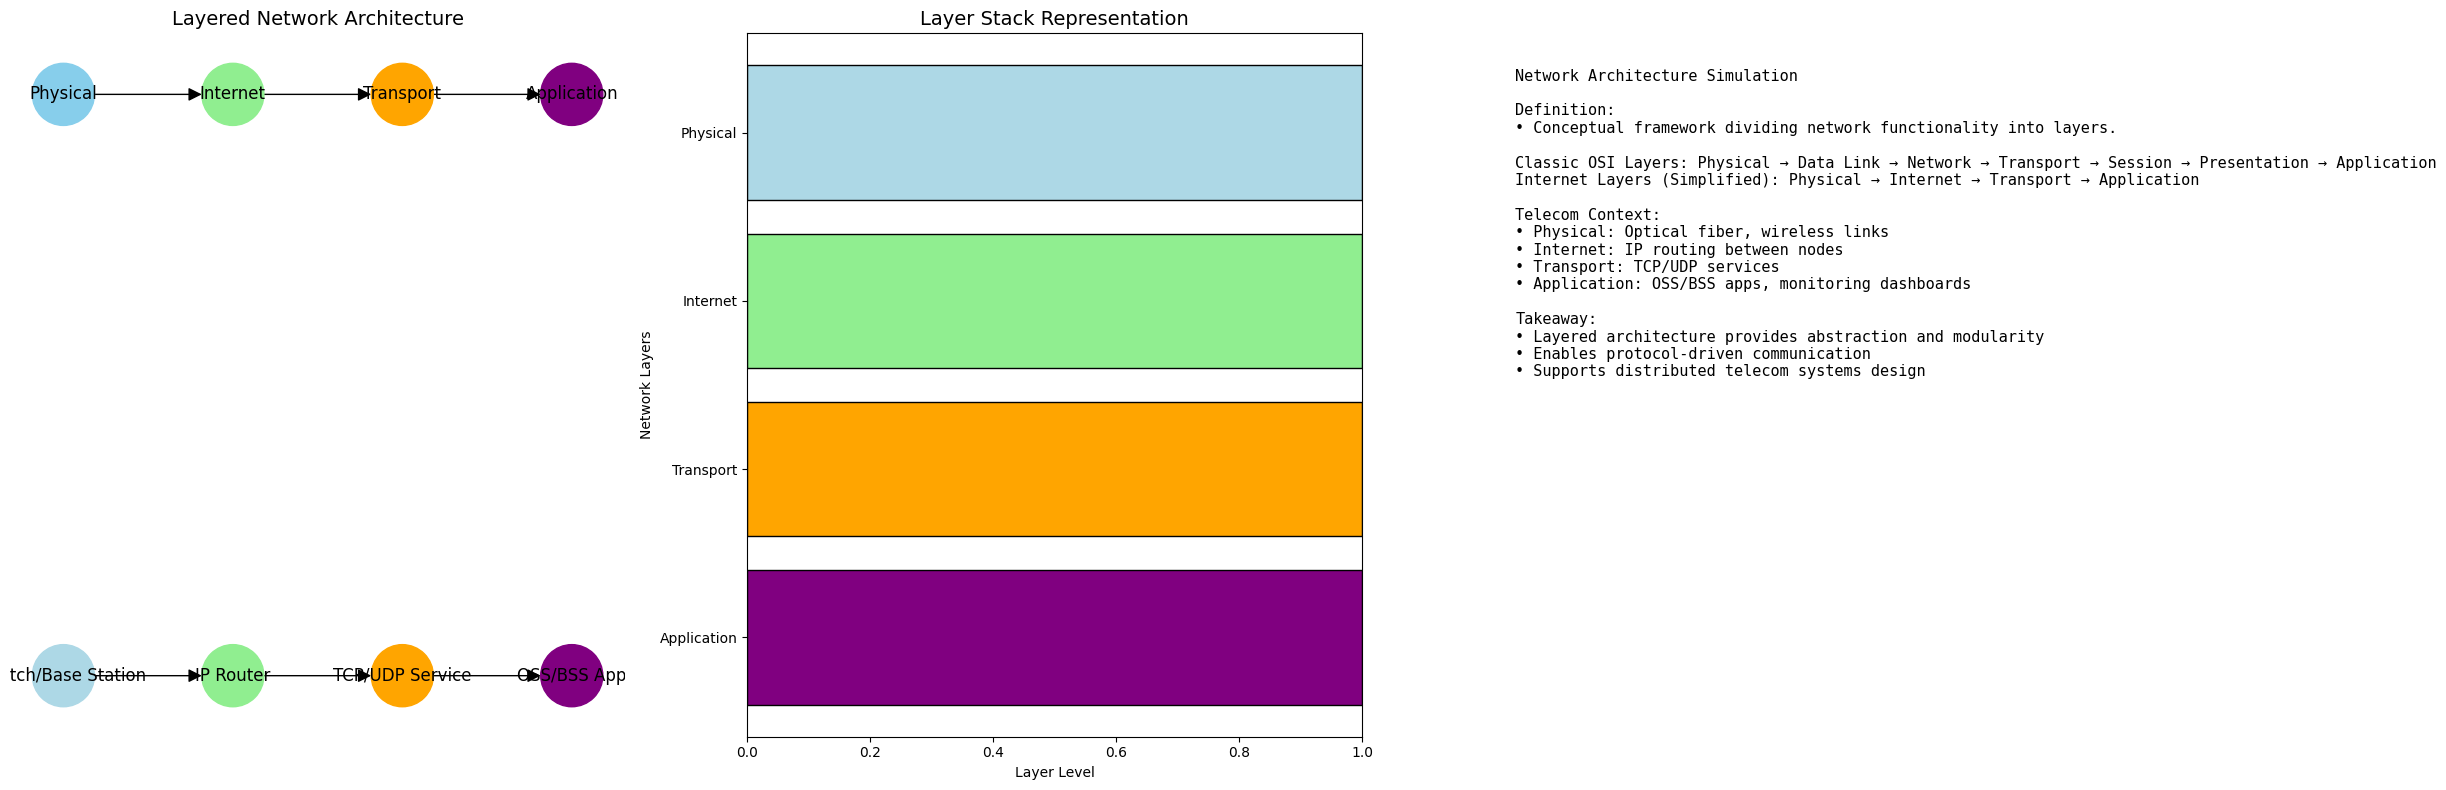

In [83]:
# Example: Network Architecture Simulation
import matplotlib.pyplot as plt
import networkx as nx

# --- Define simplified Internet layers ---
layers = ['Physical', 'Internet', 'Transport', 'Application']
layer_colors = ['lightblue', 'lightgreen', 'orange', 'purple']

# ---  Simulate data flow between layers ---
G = nx.DiGraph()
for i in range(len(layers)-1):
    G.add_edge(layers[i], layers[i+1])

# Add nodes for telecom devices/applications
G.add_node('Switch/Base Station', layer='Physical')
G.add_node('IP Router', layer='Internet')
G.add_node('TCP/UDP Service', layer='Transport')
G.add_node('OSS/BSS App', layer='Application')
G.add_edges_from([
    ('Switch/Base Station', 'IP Router'),
    ('IP Router', 'TCP/UDP Service'),
    ('TCP/UDP Service', 'OSS/BSS App')
])

# Positions for visualization
pos = {
    'Physical': (0, 3), 'Internet': (1, 3), 'Transport': (2, 3), 'Application': (3, 3),
    'Switch/Base Station': (0, 2), 'IP Router': (1, 2),
    'TCP/UDP Service': (2, 2), 'OSS/BSS App': (3, 2)
}

# ---  Create 3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Panel 1: Layered architecture visualization
nx.draw(G, pos, with_labels=True, node_color=['skyblue','lightgreen','orange','purple','lightblue','lightgreen','orange','purple'],
        node_size=2000, arrowsize=20, ax=axes[0])
axes[0].set_title('Layered Network Architecture', fontsize=14)

# Panel 2: Simplified layer stack
axes[1].barh(layers[::-1], [1]*len(layers), color=layer_colors[::-1], edgecolor='black')
axes[1].set_xlim(0, 1)
axes[1].set_title('Layer Stack Representation', fontsize=14)
axes[1].set_xlabel('Layer Level')
axes[1].set_ylabel('Network Layers')

# Panel 3: Annotated Summary
axes[2].axis('off')
summary_text = (
    f"Network Architecture Simulation\n\n"
    f"Definition:\n"
    f"• Conceptual framework dividing network functionality into layers.\n\n"
    f"Classic OSI Layers: Physical → Data Link → Network → Transport → Session → Presentation → Application\n"
    f"Internet Layers (Simplified): Physical → Internet → Transport → Application\n\n"
    f"Telecom Context:\n"
    f"• Physical: Optical fiber, wireless links\n"
    f"• Internet: IP routing between nodes\n"
    f"• Transport: TCP/UDP services\n"
    f"• Application: OSS/BSS apps, monitoring dashboards\n\n"
    f"Takeaway:\n"
    f"• Layered architecture provides abstraction and modularity\n"
    f"• Enables protocol-driven communication\n"
    f"• Supports distributed telecom systems design"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


### c) Network Architecture Protocols

---

### Internet Layer Protocol
- **Internet Protocol (IP):** Responsible for addressing computers (hosts) on the network and routing data between them.  
  Ensures each packet reaches the correct destination node in a distributed telecom or IT system.

---

### Transport Layer Protocols
- **Transmission Control Protocol (TCP):** Provides connection-oriented communication with reliable, ordered delivery of data packets.  
- **User Datagram Protocol (UDP):** Provides connectionless communication for fast, low-latency transmission where reliability is handled by the application.  

These protocols enable processes on distributed computers to exchange data efficiently.

---

### Application Layer Protocols
Protocols designed for end-user network services include:  
- **HTTP (Hypertext Transfer Protocol):** Web applications and dashboards.  
- **FTP (File Transfer Protocol):** Reliable file transfer between telecom nodes.  
- **SNMP (Simple Network Management Protocol):** Monitoring and managing distributed network devices.

---

### TCP/IP Stack
- Combines the Internet and transport layer protocols.  
- Forms the foundation for most distributed computing in the Internet and telecom domains.  
- Any distributed application must operate on systems implementing this protocol stack.

---

### Telecom Context
- IP addresses identify networked switches, base stations, or servers.  
- TCP ensures reliable call routing, subscriber billing, or session management.  
- UDP is used for streaming voice/data or real-time telemetry.  
- Application protocols enable user-facing services such as web portals, network dashboards, or OSS/BSS tools.

---

### Takeaway
Understanding network architecture protocols is critical for developing distributed telecom applications that are **reliable, scalable, and interoperable** across heterogeneous systems.


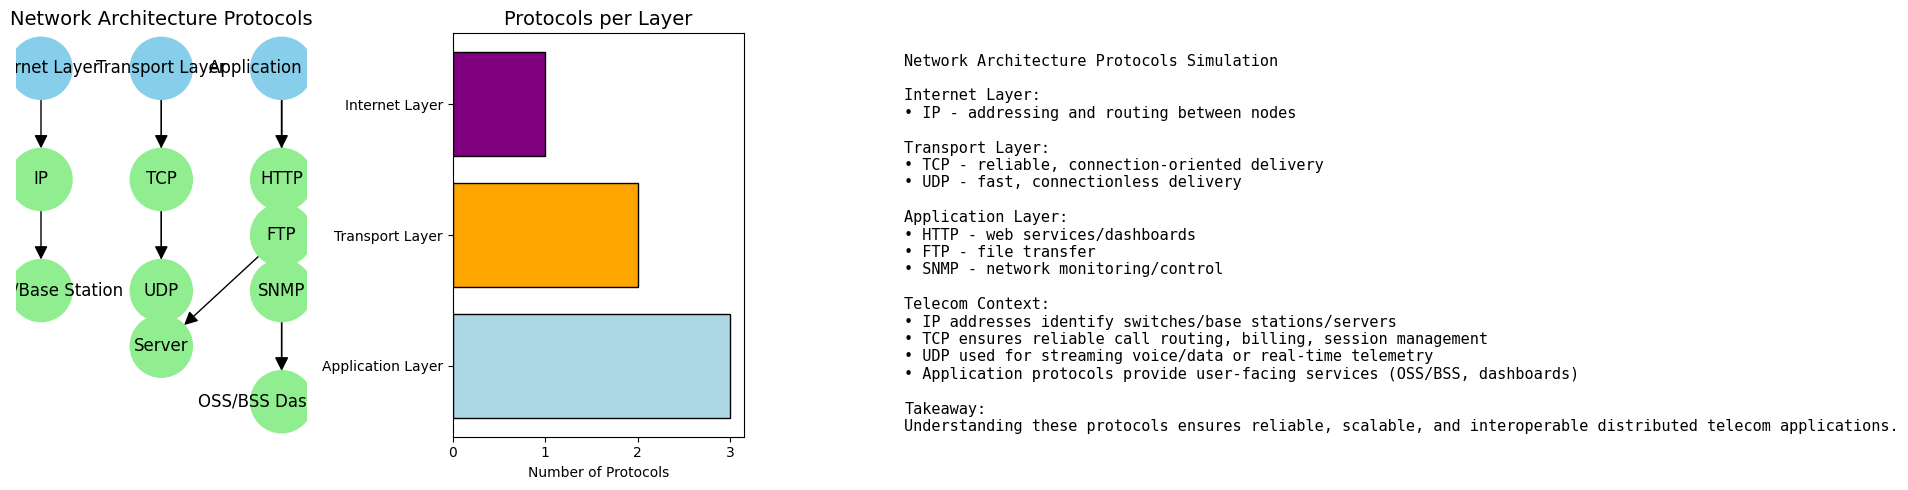

In [84]:
# Example: Network Architecture Protocols Simulation
import matplotlib.pyplot as plt
import networkx as nx

# ---  Define protocol stack ---
protocols = {
    'Internet Layer': ['IP'],
    'Transport Layer': ['TCP', 'UDP'],
    'Application Layer': ['HTTP', 'FTP', 'SNMP']
}

# --- Create network graph representing protocol interactions ---
G = nx.DiGraph()

# Add nodes and edges to show communication hierarchy
for layer, protos in protocols.items():
    G.add_node(layer, layer_type='Layer')
    for proto in protos:
        G.add_node(proto, layer_type='Protocol')
        G.add_edge(layer, proto)

# Add example telecom entities using these protocols
G.add_node('Switch/Base Station')
G.add_node('Server')
G.add_node('OSS/BSS Dashboard')
G.add_edges_from([
    ('IP', 'Switch/Base Station'),
    ('TCP', 'Server'),
    ('UDP', 'Server'),
    ('HTTP', 'OSS/BSS Dashboard'),
    ('FTP', 'Server'),
    ('SNMP', 'OSS/BSS Dashboard')
])

# ---  Define positions for visualization ---
pos = {
    'Internet Layer': (0, 3),
    'Transport Layer': (1, 3),
    'Application Layer': (2, 3),
    'IP': (0, 2), 'TCP': (1, 2), 'UDP': (1, 1),
    'HTTP': (2, 2), 'FTP': (2, 1.5), 'SNMP': (2, 1),
    'Switch/Base Station': (0, 1), 'Server': (1, 0.5), 'OSS/BSS Dashboard': (2, 0)
}

# ---  3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: Protocol hierarchy graph
node_colors = ['skyblue' if 'Layer' in str(G.nodes[n].get('layer_type')) else 'lightgreen' for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, arrowsize=20, ax=axes[0])
axes[0].set_title('Network Architecture Protocols', fontsize=14)

# Panel 2: Protocol stack bar chart
layer_names = list(protocols.keys())
num_protocols = [len(protocols[layer]) for layer in layer_names]
axes[1].barh(layer_names[::-1], num_protocols[::-1], color=['lightblue','orange','purple'], edgecolor='black')
axes[1].set_xlabel('Number of Protocols')
axes[1].set_title('Protocols per Layer', fontsize=14)

# Panel 3: Annotated Summary
axes[2].axis('off')
summary_text = (
    f"Network Architecture Protocols Simulation\n\n"
    f"Internet Layer:\n"
    f"• IP - addressing and routing between nodes\n\n"
    f"Transport Layer:\n"
    f"• TCP - reliable, connection-oriented delivery\n"
    f"• UDP - fast, connectionless delivery\n\n"
    f"Application Layer:\n"
    f"• HTTP - web services/dashboards\n"
    f"• FTP - file transfer\n"
    f"• SNMP - network monitoring/control\n\n"
    f"Telecom Context:\n"
    f"• IP addresses identify switches/base stations/servers\n"
    f"• TCP ensures reliable call routing, billing, session management\n"
    f"• UDP used for streaming voice/data or real-time telemetry\n"
    f"• Application protocols provide user-facing services (OSS/BSS, dashboards)\n\n"
    f"Takeaway:\n"
    f"Understanding these protocols ensures reliable, scalable, and interoperable distributed telecom applications."
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


### d) Connection-Oriented versus Connectionless Communication

---

### Connection-Oriented Communication
- Establishes a dedicated logical or physical connection between sender and receiver before data transfer begins.  
- Once established, data can flow continuously over the connection without addressing each packet individually.  
- Ensures ordered and reliable delivery of data at the cost of additional connection setup and maintenance overhead.

**Telecom Examples:**  
- Voice calls in circuit-switched networks.  
- TCP-based data transfers in subscriber billing or call record systems.  
- Video or voice over LTE (VoLTE) sessions requiring reliable end-to-end communication.

---

### Connectionless Communication
- No dedicated connection is established; each data packet is addressed and transmitted independently.  
- Simpler to implement and faster for small, sporadic exchanges but lacks guaranteed order or reliability.

**Telecom Examples:**  
- UDP-based streaming telemetry from network elements.  
- Short control messages in distributed network monitoring.  
- SMS messages or email sent over the IP network.

---

### Layer Considerations
- Protocols may be connection-oriented at one layer and connectionless at another.  
- **Example:** HTTP is connection-oriented at the application layer, but underlying transport may use UDP for speed in certain streaming applications.

---

### Trade-offs

| Feature | Connection-Oriented | Connectionless |
|---------|--------------------|----------------|
| Addressing | Specified once at connection setup | Specified for each packet |
| Overhead | Connection setup required | Minimal per-packet overhead |
| Delivery Order | Maintained by the connection | Not guaranteed; packets may arrive out of order |
| Suitable Use | Large or continuous data streams, multiple rounds of exchange | Small, sporadic messages, few rounds of exchange |

---

### Takeaway
Choosing between connection-oriented and connectionless communication is a trade-off between **reliability and efficiency**, and it is a critical decision in designing distributed telecom systems that balance performance, fault tolerance, and scalability.


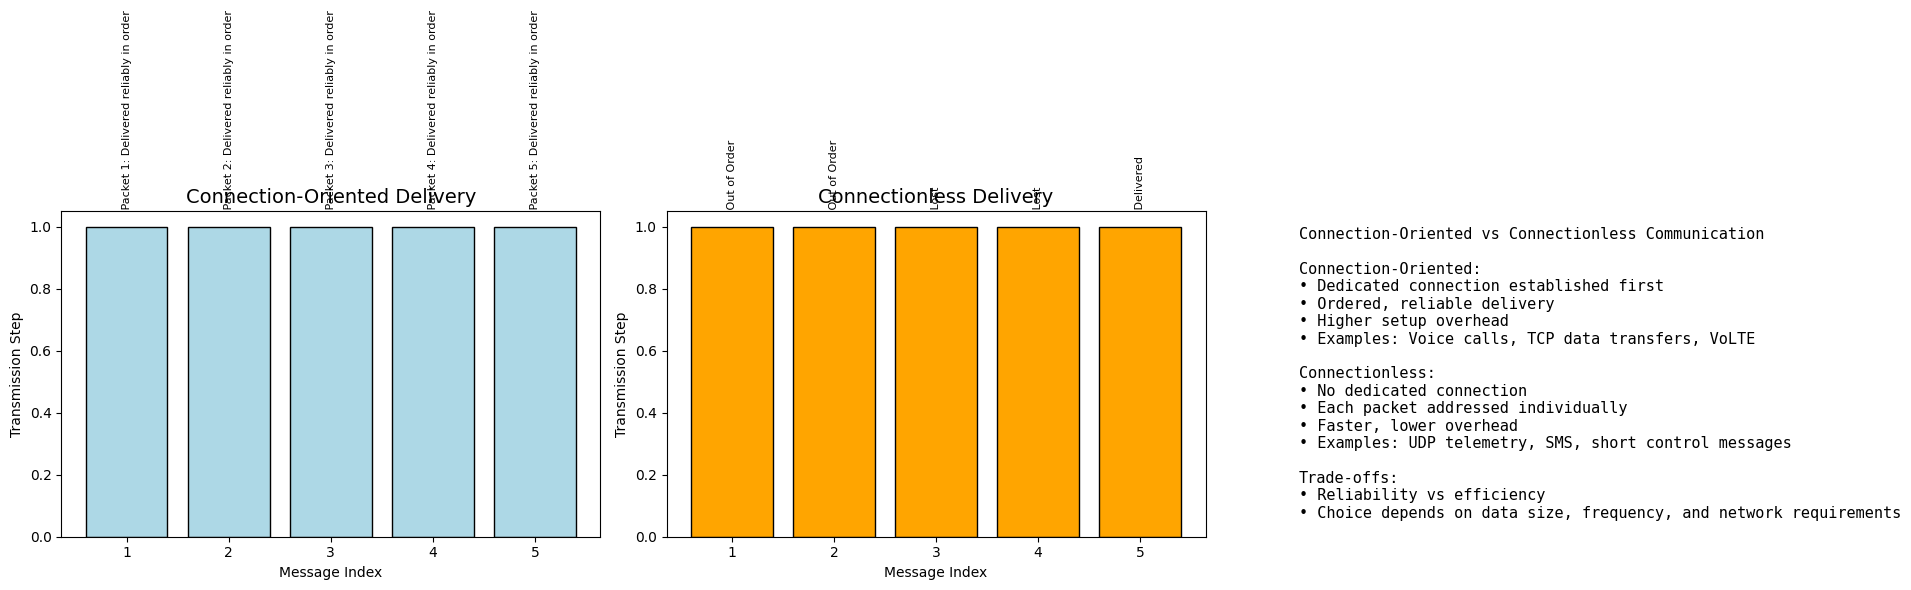

In [85]:
# Example: Connection-Oriented vs Connectionless Communication
import matplotlib.pyplot as plt
import random
import time

# ---  Simulate message transmission ---
connection_oriented_log = []
connectionless_log = []

# Connection-Oriented: establish once, then send messages reliably
def connection_oriented_send(messages):
    connection = "Connection Established"
    for msg in messages:
        time.sleep(0.3)
        connection_oriented_log.append(f"{connection} -> {msg}: Delivered reliably in order")

# Connectionless: each message sent independently
def connectionless_send(messages):
    for msg in messages:
        time.sleep(0.2)
        status = random.choice(["Delivered", "Out of Order", "Lost"])
        connectionless_log.append(f"{msg}: {status}")

# Simulate message sending
messages = [f"Packet {i}" for i in range(1, 6)]
connection_oriented_send(messages)
connectionless_send(messages)

# ---  Prepare visualization ---
indices = list(range(1, len(messages)+1))

# ---  3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Panel 1: Connection-Oriented message log (bar chart)
axes[0].bar(indices, [1]*len(indices), color='lightblue', edgecolor='black')
axes[0].set_title('Connection-Oriented Delivery', fontsize=14)
axes[0].set_xlabel('Message Index')
axes[0].set_ylabel('Transmission Step')
for i, msg in enumerate(connection_oriented_log):
    axes[0].text(indices[i], 1.05, msg.split("->")[1], rotation=90, fontsize=8, ha='center')

# Panel 2: Connectionless message log
axes[1].bar(indices, [1]*len(indices), color='orange', edgecolor='black')
axes[1].set_title('Connectionless Delivery', fontsize=14)
axes[1].set_xlabel('Message Index')
axes[1].set_ylabel('Transmission Step')
for i, msg in enumerate(connectionless_log):
    axes[1].text(indices[i], 1.05, msg.split(":")[1], rotation=90, fontsize=8, ha='center')

# Panel 3: Annotated Summary
axes[2].axis('off')
summary_text = (
    f"Connection-Oriented vs Connectionless Communication\n\n"
    f"Connection-Oriented:\n"
    f"• Dedicated connection established first\n"
    f"• Ordered, reliable delivery\n"
    f"• Higher setup overhead\n"
    f"• Examples: Voice calls, TCP data transfers, VoLTE\n\n"
    f"Connectionless:\n"
    f"• No dedicated connection\n"
    f"• Each packet addressed individually\n"
    f"• Faster, lower overhead\n"
    f"• Examples: UDP telemetry, SMS, short control messages\n\n"
    f"Trade-offs:\n"
    f"• Reliability vs efficiency\n"
    f"• Choice depends on data size, frequency, and network requirements\n"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


### e) Network Resources

---

**Definition:**  
Network resources are the hardware, software, and services available to participants in a distributed computing system.

---

### Hardware Resources
- Computers (servers, workstations, and Internet hosts).  
- Network equipment such as routers, switches, base stations, and telecom terminals.  
- Peripherals connected to the network, including printers, cameras, and measurement devices.

---

### Software Resources
- Executing processes, applications, and services.  
- Email accounts, file storage, and Web documents.  
- Network services like directory services, authentication services, and distributed databases.

---

### Network Services
- Services are specialized processes running on networked computers.  

**Examples in telecom:**  
- **World Wide Web (WWW):** Provides information and service portals.  
- **File Transfer Service (FTP/SFTP):** Enables exchange of large files between network nodes.  
- **OSS/BSS Applications:** Billing, provisioning, and monitoring in telecom networks.

---

### Key Challenge
- Unique identification of network resources is critical.  
- Distributed telecom systems must correctly identify and access remote resources, whether hardware, software, or service endpoints, to ensure interoperability and reliability.

---

### Takeaway
Efficient utilization of network resources underpins all distributed computing applications in telecommunications, enabling **resource sharing, scalability, and service delivery** across geographically dispersed systems.


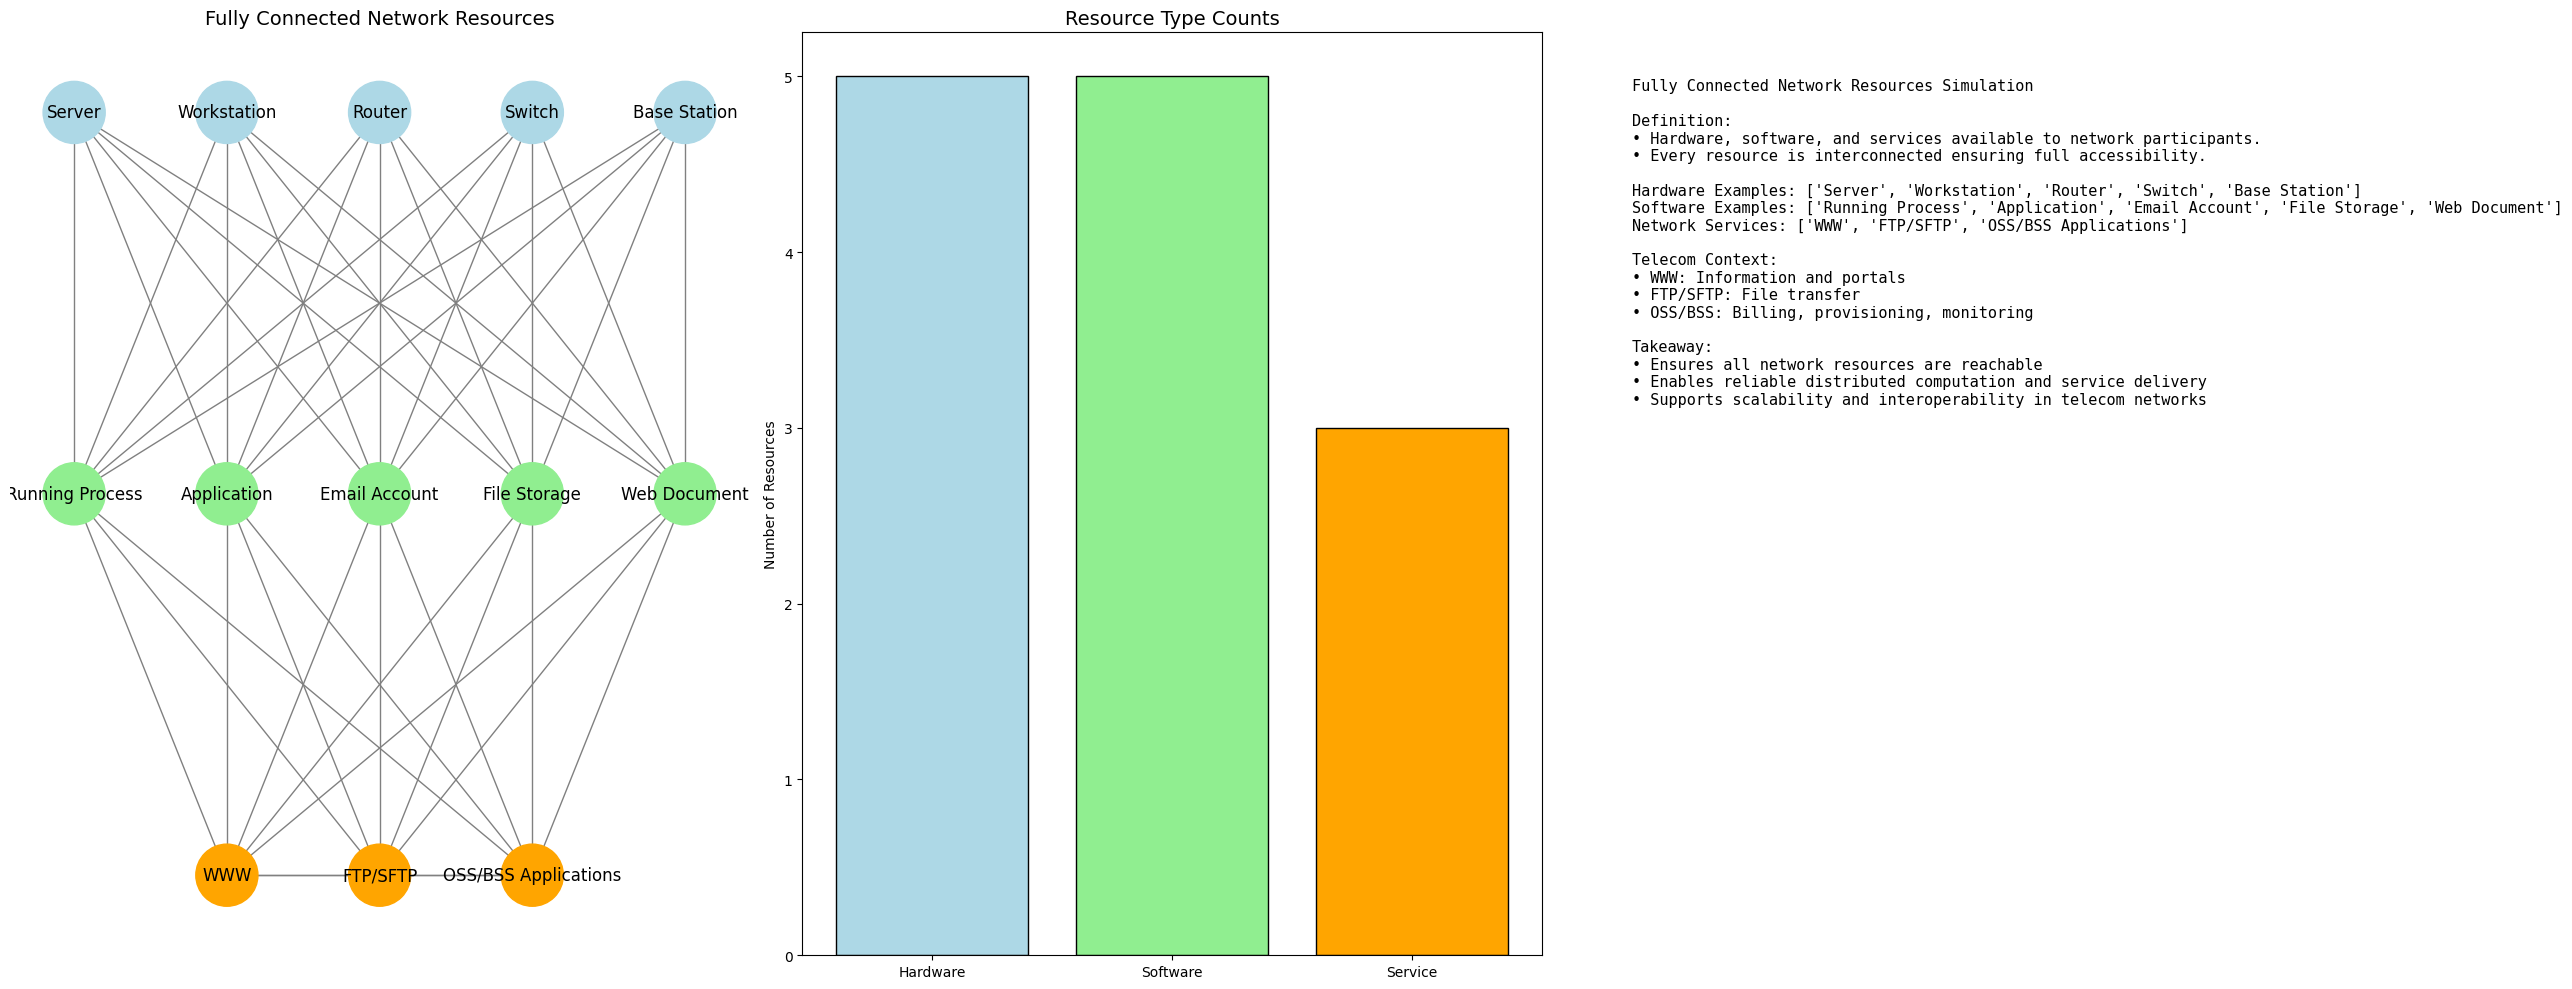

In [86]:
# Example: Fully Connected Network Resources Simulation
import matplotlib.pyplot as plt
import networkx as nx

# --- Define network resources ---
hardware_resources = ['Server', 'Workstation', 'Router', 'Switch', 'Base Station']
software_resources = ['Running Process', 'Application', 'Email Account', 'File Storage', 'Web Document']
network_services = ['WWW', 'FTP/SFTP', 'OSS/BSS Applications']

# ---  Create network graph ---
G = nx.Graph()

# Add all nodes
for hw in hardware_resources:
    G.add_node(hw, type='Hardware')
for sw in software_resources:
    G.add_node(sw, type='Software')
for svc in network_services:
    G.add_node(svc, type='Service')

# Connect each hardware to all software (dependency)
for hw in hardware_resources:
    for sw in software_resources:
        G.add_edge(hw, sw)

# Connect each software to all services (dependency)
for sw in software_resources:
    for svc in network_services:
        G.add_edge(sw, svc)

# Connect services to each other for full connectivity
for i in range(len(network_services)):
    for j in range(i+1, len(network_services)):
        G.add_edge(network_services[i], network_services[j])

# ---  Define positions for visualization ---
pos = {
    'Server': (0, 3), 'Workstation': (1, 3), 'Router': (2, 3), 'Switch': (3, 3), 'Base Station': (4, 3),
    'Running Process': (0, 2), 'Application': (1, 2), 'Email Account': (2, 2), 'File Storage': (3, 2), 'Web Document': (4, 2),
    'WWW': (1, 1), 'FTP/SFTP': (2, 1), 'OSS/BSS Applications': (3, 1)
}

# ---  3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(27, 10))

# Panel 1: Fully connected resource graph
colors = []
for n in G.nodes():
    if n in hardware_resources:
        colors.append('lightblue')
    elif n in software_resources:
        colors.append('lightgreen')
    else:
        colors.append('orange')

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000, edge_color='gray', ax=axes[0])
axes[0].set_title('Fully Connected Network Resources', fontsize=14)

# Panel 2: Resource type counts
resource_types = ['Hardware', 'Software', 'Service']
counts = [len(hardware_resources), len(software_resources), len(network_services)]
axes[1].bar(resource_types, counts, color=['lightblue', 'lightgreen', 'orange'], edgecolor='black')
axes[1].set_title('Resource Type Counts', fontsize=14)
axes[1].set_ylabel('Number of Resources')

# Panel 3: Annotated Summary
axes[2].axis('off')
summary_text = (
    f"Fully Connected Network Resources Simulation\n\n"
    f"Definition:\n"
    f"• Hardware, software, and services available to network participants.\n"
    f"• Every resource is interconnected ensuring full accessibility.\n\n"
    f"Hardware Examples: {hardware_resources}\n"
    f"Software Examples: {software_resources}\n"
    f"Network Services: {network_services}\n\n"
    f"Telecom Context:\n"
    f"• WWW: Information and portals\n"
    f"• FTP/SFTP: File transfer\n"
    f"• OSS/BSS: Billing, provisioning, monitoring\n\n"
    f"Takeaway:\n"
    f"• Ensures all network resources are reachable\n"
    f"• Enables reliable distributed computation and service delivery\n"
    f"• Supports scalability and interoperability in telecom networks"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


### f) Host Identification and Internet Protocol (IP) Addresses

---

### Internet Topology
- Physically, the Internet is a vast mesh of networks and computers.  
- Conceptually, high-bandwidth links form the Internet backbone, connecting multiple networks.  
- Each network has a unique identifier, and TCP/IP-enabled computers, called Internet hosts, are linked to these networks.

---

### Process Identification
To send data, a process must be uniquely identified across the network.  
Identification requires specifying:  
- Network  
- Host on the network  
- Process running on the host

---

### IP Addressing (IPv4)
- Each host is assigned a unique 32-bit IPv4 address.  
- Total address space: 2³² (~4.3 billion addresses).  
- **Address Classes:** A, B, C, D (multicast), E (reserved)  
  - Class A: Supports ~16 million hosts per network  
  - Class B: Supports ~65,000 hosts per network  
  - Class C: Supports fewer hosts but more networks  

- Addresses often represented in **dotted decimal notation** for readability (e.g., 129.65.24.50).

---

### Subnetting
- Organizations subdivide their network into subnets.  
- **Example:** IP 129.65.32.3 → network 129.65, subnet 32, host 3.

---

### Dynamic Addressing
- To handle limited address space, ISPs and large organizations use **dynamic IP assignment**.  
- A host’s IP may change between sessions while remaining reachable.

---

### Domain Names and DNS
- Numeric IPs are difficult to remember; **Domain Name System (DNS)** maps symbolic names to IP addresses.  
- **Domain name structure:**  
  - Top-level domain (TLD): .com, .edu, .gov, .net, .org, .mil, or country codes (.ca, .jp).  
  - Second-level domain identifies the organization (e.g., calpoly.edu).  
  - Optional subdomains identify subnets or hosts (e.g., www.csc.calpoly.edu).  
  - `localhost` always maps to 127.0.0.1 (refers to the local machine).

---

### Key Takeaways
Host identification combines **IP addresses, subnetting, and DNS**.  
Once a host is located, individual **resources or processes** on that host can be addressed.


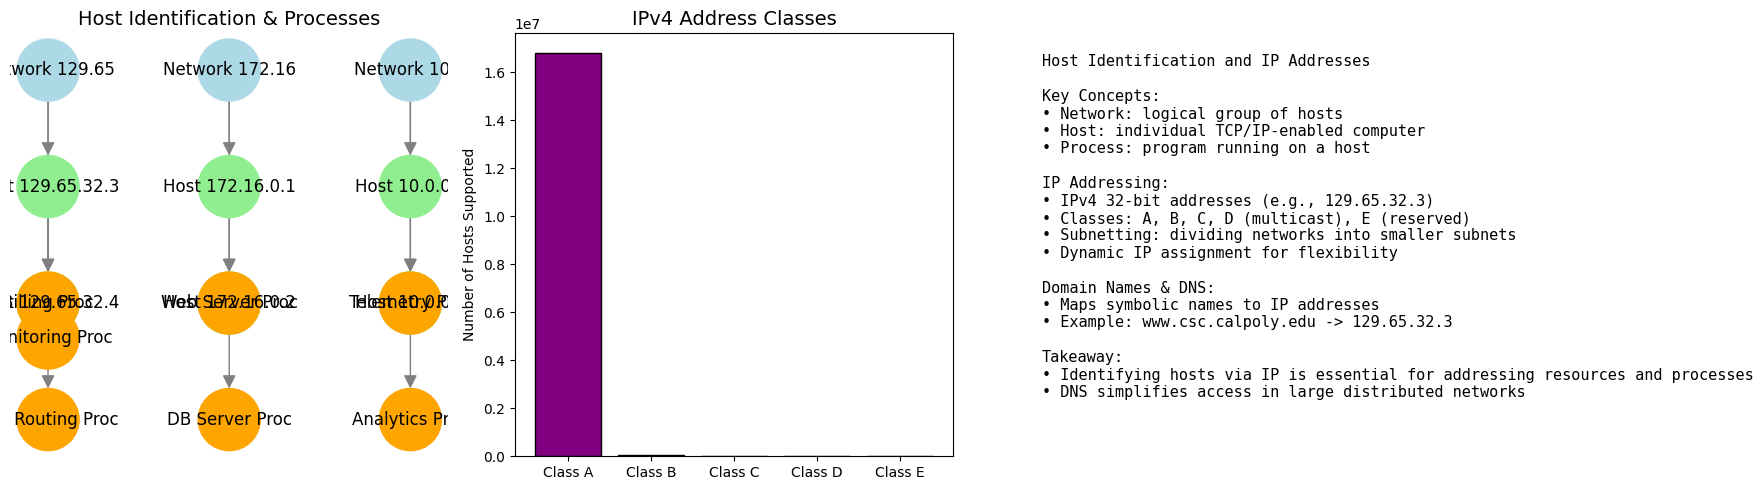

In [87]:
# Example: Host Identification and IP Addresses
import matplotlib.pyplot as plt
import networkx as nx

# --- Define network, hosts, and processes ---
networks = ['Network 129.65', 'Network 172.16', 'Network 10.0']
hosts = {
    'Network 129.65': ['Host 129.65.32.3', 'Host 129.65.32.4'],
    'Network 172.16': ['Host 172.16.0.1', 'Host 172.16.0.2'],
    'Network 10.0': ['Host 10.0.0.1', 'Host 10.0.0.2']
}
processes = {
    'Host 129.65.32.3': ['Billing Proc', 'Monitoring Proc'],
    'Host 129.65.32.4': ['Call Routing Proc'],
    'Host 172.16.0.1': ['Web Server Proc'],
    'Host 172.16.0.2': ['DB Server Proc'],
    'Host 10.0.0.1': ['Telemetry Proc'],
    'Host 10.0.0.2': ['Analytics Proc']
}

# --- Create network graph ---
G = nx.DiGraph()

# Add network nodes
for net in networks:
    G.add_node(net, type='Network')

# Add host nodes and connect to networks
for net, hs in hosts.items():
    for h in hs:
        G.add_node(h, type='Host')
        G.add_edge(net, h)

# Add process nodes and connect to hosts
for host, procs in processes.items():
    for p in procs:
        G.add_node(p, type='Process')
        G.add_edge(host, p)

# Define positions
pos = {}
x_offset = 0
for i, net in enumerate(networks):
    pos[net] = (i*3, 4)
    y_offset = 3
    for j, h in enumerate(hosts[net]):
        pos[h] = (i*3, y_offset)
        y_offset -= 1
        for k, p in enumerate(processes[h]):
            pos[p] = (i*3, y_offset - 0.3*k)

# --- 3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: Network → Host → Process hierarchy
node_colors = []
for n in G.nodes():
    if 'Network' in n:
        node_colors.append('lightblue')
    elif 'Host' in n:
        node_colors.append('lightgreen')
    else:
        node_colors.append('orange')

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, edge_color='gray', arrowsize=20, ax=axes[0])
axes[0].set_title('Host Identification & Processes', fontsize=14)

# Panel 2: IP Address Classes (bar chart)
classes = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']
hosts_supported = [16777214, 65534, 254, 0, 0]
axes[1].bar(classes, hosts_supported, color='purple', edgecolor='black')
axes[1].set_title('IPv4 Address Classes', fontsize=14)
axes[1].set_ylabel('Number of Hosts Supported')

# Panel 3:Summary
axes[2].axis('off')
summary_text = (
    f"Host Identification and IP Addresses\n\n"
    f"Key Concepts:\n"
    f"• Network: logical group of hosts\n"
    f"• Host: individual TCP/IP-enabled computer\n"
    f"• Process: program running on a host\n\n"
    f"IP Addressing:\n"
    f"• IPv4 32-bit addresses (e.g., 129.65.32.3)\n"
    f"• Classes: A, B, C, D (multicast), E (reserved)\n"
    f"• Subnetting: dividing networks into smaller subnets\n"
    f"• Dynamic IP assignment for flexibility\n\n"
    f"Domain Names & DNS:\n"
    f"• Maps symbolic names to IP addresses\n"
    f"• Example: www.csc.calpoly.edu -> 129.65.32.3\n\n"
    f"Takeaway:\n"
    f"• Identifying hosts via IP is essential for addressing resources and processes\n"
    f"• DNS simplifies access in large distributed networks"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


### g) Identifying Processes, Email Recipients, and Web Documents

---

#### 1. Identifying Processes with Protocol Ports
- Locating a host by its domain name or IP address is not enough; we must also deliver data to a specific process on that host.  
- **Protocol Ports:** Logical identifiers used by the transport layer (TCP or UDP) to route data to the correct process.  
- Each host has 65,536 ports per protocol.  
- **Well-known ports (0–1023):** Reserved for standard services (e.g., HTTP: 80, FTP: 21, SMTP: 25, Telnet: 23).  
- **Example:** Accessing www.calpoly.edu in a browser typically uses TCP port 80.

---

#### 2. Email Addresses
- **Format:** username@DomainName  
- **Example:** mliu@csc.calpoly.edu  
- The mailer program on the host delivers the email to the recipient’s mailbox.

---

#### 3. URLs and URIs
- **URL (Uniform Resource Locator):** Specifies the location of a resource on the Web.  
- **URI (Uniform Resource Identifier):** General scheme for identifying Web resources, including documents, images, files, and mailboxes.  

**URL format (generalized):**  


/tmp/ipython-input-3587587901.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(port_names, rotation=45, ha='right')


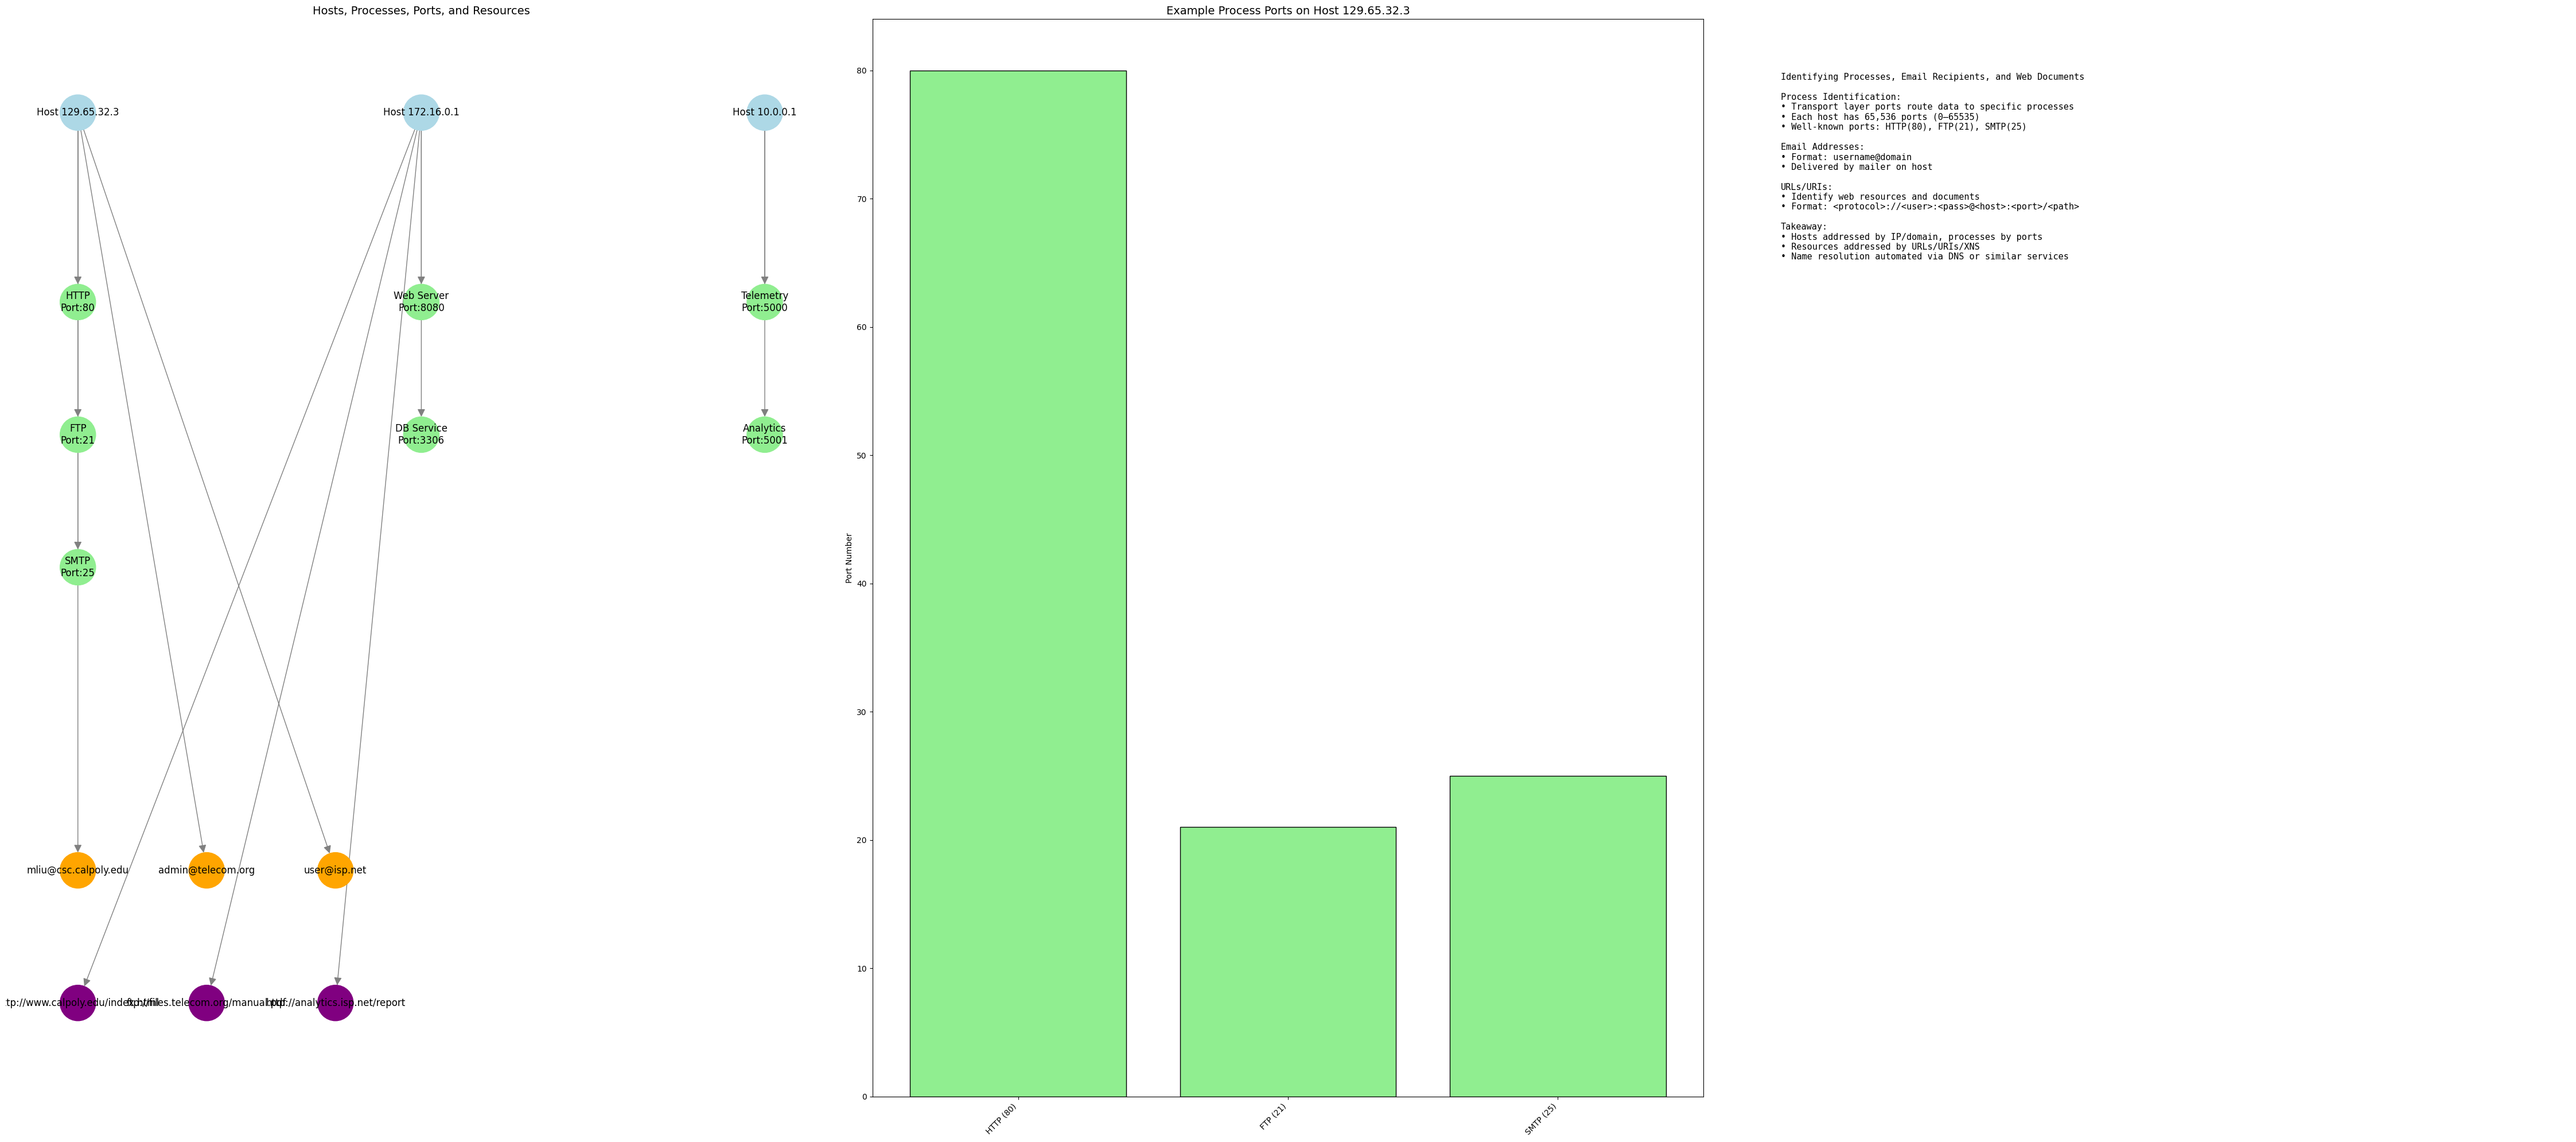

In [88]:
# Example: Process, Email, and Web Resource Identification (Corrected)
import matplotlib.pyplot as plt
import networkx as nx

# ---  Define hosts, processes, ports, and resources ---
hosts = ['Host 129.65.32.3', 'Host 172.16.0.1', 'Host 10.0.0.1']
processes = {
    'Host 129.65.32.3': {'HTTP': 80, 'FTP': 21, 'SMTP': 25},
    'Host 172.16.0.1': {'Web Server': 8080, 'DB Service': 3306},
    'Host 10.0.0.1': {'Telemetry': 5000, 'Analytics': 5001}
}
emails = ['mliu@csc.calpoly.edu', 'admin@telecom.org', 'user@isp.net']
web_docs = [
    'http://www.calpoly.edu/index.html',
    'ftp://files.telecom.org/manual.pdf',
    'http://analytics.isp.net/report'
]

# ---  Create network graph ---
G = nx.DiGraph()

# Add hosts
for h in hosts:
    G.add_node(h, type='Host')

# Add processes and ports
for h, procs in processes.items():
    for proc, port in procs.items():
        node_name = f"{proc}\nPort:{port}"
        G.add_node(node_name, type='Process')
        G.add_edge(h, node_name)

# Add email and web document nodes
for email in emails:
    G.add_node(email, type='Email')
    G.add_edge(hosts[0], email)  # example: link all emails to first host

for doc in web_docs:
    G.add_node(doc, type='WebDoc')
    G.add_edge(hosts[1], doc)  # example: link all web docs to second host

# ---  Assign positions for all nodes ---
pos = {}
# Manual positions for hosts
x_offsets = [0, 4, 8]
y_host = 4
for i, h in enumerate(hosts):
    pos[h] = (x_offsets[i], y_host)

# Positions for processes under each host
for i, h in enumerate(hosts):
    y = y_host - 1
    for proc in processes[h]:
        node_name = f"{proc}\nPort:{processes[h][proc]}"
        pos[node_name] = (x_offsets[i], y)
        y -= 0.7

# Positions for email and web docs (automatic if not manually assigned)
y_start = 0
x_start = 0
x_spacing = 1.5
y_spacing = 0.7
i = 0
for node in G.nodes():
    if node not in pos:
        pos[node] = (x_start + (i % 3) * x_spacing, y_start - (i // 3) * y_spacing)
        i += 1

# ---  3-panel layout ---
fig, axes = plt.subplots(1, 3, figsize=(45, 20))

# Panel 1: Host → Process → Port → Email/WebDoc
node_colors = []
for n in G.nodes():
    if n in hosts:
        node_colors.append('lightblue')
    elif any(n.startswith(p) for p in sum([list(procs.keys()) for procs in processes.values()], [])):
        node_colors.append('lightgreen')
    elif n in emails:
        node_colors.append('orange')
    else:
        node_colors.append('purple')

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000,
        edge_color='gray', arrowsize=20, ax=axes[0])
axes[0].set_title('Hosts, Processes, Ports, and Resources', fontsize=14)

# Panel 2: Example Port Usage (bar chart) for first host
port_names = [f"{proc} ({port})" for proc, port in processes['Host 129.65.32.3'].items()]
port_values = list(processes['Host 129.65.32.3'].values())
axes[1].bar(port_names, port_values, color='lightgreen', edgecolor='black')
axes[1].set_title('Example Process Ports on Host 129.65.32.3', fontsize=14)
axes[1].set_ylabel('Port Number')
axes[1].set_xticklabels(port_names, rotation=45, ha='right')

# Panel 3: Annotated Summary
axes[2].axis('off')
summary_text = (
    f"Identifying Processes, Email Recipients, and Web Documents\n\n"
    f"Process Identification:\n"
    f"• Transport layer ports route data to specific processes\n"
    f"• Each host has 65,536 ports (0–65535)\n"
    f"• Well-known ports: HTTP(80), FTP(21), SMTP(25)\n\n"
    f"Email Addresses:\n"
    f"• Format: username@domain\n"
    f"• Delivered by mailer on host\n\n"
    f"URLs/URIs:\n"
    f"• Identify web resources and documents\n"
    f"• Format: <protocol>://<user>:<pass>@<host>:<port>/<path>\n\n"
    f"Takeaway:\n"
    f"• Hosts addressed by IP/domain, processes by ports\n"
    f"• Resources addressed by URLs/URIs/XNS\n"
    f"• Name resolution automated via DNS or similar services"
)
axes[2].text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()


## 1.7 Software Engineering Basics

---

### 1. Software Engineering Overview
Software engineering is the systematic discipline of designing, developing, testing, and maintaining software applications.  

In distributed computing, the challenge is not just writing code, but designing applications that work reliably over multiple computers and networks.

**Key concerns include:**  
- **Correctness:** ensuring the program performs as intended.  
- **Scalability:** handling growth in users, data, and network traffic.  
- **Maintainability:** modifying the system without introducing errors.  
- **Reusability:** using software components across multiple projects.

> While this course focuses on technical implementation of distributed applications, understanding software engineering principles ensures applications are well-structured and maintainable.

---

### 2. Procedural vs. Object-Oriented Programming

**Procedural Programming:**  
- Organizes code into procedures (functions).  
- Each procedure performs a specific task, and programs are executed sequentially.  

**Example:** Procedure for input → Procedure for computation → Procedure for output.  

**Strengths:** Simplicity for small programs, straightforward control flow.  
**Weaknesses:** Scaling to large distributed applications is harder because:  
- Data and behavior are separate → risk of inconsistent state.  
- Hard to model real-world entities naturally.

**Object-Oriented Programming (OOP):**  
- Organizes code around objects, which represent entities with state (data) and behavior (methods).  

**Key OOP principles relevant to distributed systems:**  
- **Encapsulation:** hides internal state; external code interacts via defined methods → reduces bugs and unintended interactions.  
- **Inheritance:** allows reusing and extending functionality → avoids code duplication.  
- **Polymorphism:** objects can be treated interchangeably if they implement the same interface → simplifies distributed service integration.

**Benefits for distributed applications:**  
- Easier to model real-world services, like shopping carts, users, or network connections.  
- Makes modular design possible → layers of distributed systems can be independently developed.

---

### 3. Unified Modeling Language (UML)
- UML is a visual language for documenting software.  
- Provides standardized notations so developers can communicate designs unambiguously.  

**Commonly used diagrams for distributed applications:**  
- **Class diagrams:** show classes, attributes (data), methods (behavior), and relationships.  

**Relationships:**  
- **Inheritance:** Class B extends Class A → B inherits attributes and methods.  
- **Interface implementation:** Class B implements Interface A → provides required methods.  
- **Dependency:** Class B uses Class A temporarily → indicates coupling.

**Why UML matters for distributed systems:**  
- Helps visualize service and component interactions.  
- Clarifies dependencies between modules across different machines or network nodes.  
- Ensures teams can design and debug distributed applications systematically.

---

### 4. Architecture of Distributed Applications
Distributed applications often adopt a **multi-layered architecture** to separate concerns.

**Typical layers (with distributed examples):**  

**Presentation Layer**  
- User interface layer.  
- Examples: web pages for shopping carts, mobile app screens.  
- Handles user input, formatting, and display.

**Application Logic (Business Logic) Layer**  
- Implements core functionality of the application.  
- Examples in a shopping cart: calculating order totals, applying discounts, computing taxes, validating user input or credentials.  
- Encapsulates rules and processes specific to the business domain.

**Service Layer**  
- Provides reusable services to support upper layers.  
- Examples:  
  - Database access: querying and storing user orders.  
  - Directory services: resolving hostnames or IP addresses (DNS).  
  - Interprocess communication: sending messages between processes on different hosts.  
- In distributed computing, this layer ensures reliable, consistent, and secure communication.

**Why layering is critical:**  
- **Abstracts complexity:** Developers of the presentation layer do not need to know low-level network details.  
- **Supports modularity:** Layers can be upgraded independently.  
- **Enhances reusability:** Service-layer components can be reused across multiple applications.

---

### 5. Toolkits, Frameworks, and Components

**Toolkits/Frameworks:**  
- Pre-packaged libraries of classes, tools, and examples to accelerate development.  

**Example:**  
- JDK: toolkit for building Java programs.  
- .NET Framework: toolkit for web-based applications.  

**Benefits:**  
- Reduces boilerplate code.  
- Provides tested, reliable implementations of common features (like networking).

**Component-Based Development:**  
- Build applications by assembling pre-engineered, reusable components.  

**Benefits for distributed computing:**  
- Faster development → fewer errors.  
- Easier maintenance → replace or upgrade individual components.  
- Encourages standardization, especially in enterprise systems.

**Example platforms:**  
- **EJB (Enterprise Java Beans):** reusable business logic components.  
- **COM (Component Object Model):** modular Windows-based components.

**Trade-offs:**  
- While components reduce development effort, developers must understand integration and communication between components in a distributed environment.  
- Performance can be affected by network latency or resource contention when using reusable components over a network.

---

### 6. Key Takeaways for Distributed Computing
- Layered design is fundamental for **scalability and maintainability**.  
- Object-oriented programming aligns naturally with modeling networked services.  
- UML diagrams help plan and communicate designs, particularly for distributed systems.  
- Service layer abstraction is the heart of distributed applications: networking, data access, and interprocess communication are concentrated here.  
- Frameworks and component-based development allow building complex systems efficiently but require careful planning for networked environments.


In [89]:
# ============================
# Service Layer
# ============================

class DatabaseService:
    """Service layer component for data storage"""
    def __init__(self):
        self.orders = {}  # simple in-memory DB

    def save_order(self, order_id, order_data):
        print(f"[DatabaseService] Saving order {order_id}")
        self.orders[order_id] = order_data

    def get_order(self, order_id):
        print(f"[DatabaseService] Retrieving order {order_id}")
        return self.orders.get(order_id, None)


class DiscountService:
    """Service layer component for reusable business logic"""
    def apply_discount(self, order_total, discount_rate):
        print(f"[DiscountService] Applying discount: {discount_rate*100}%")
        return order_total * (1 - discount_rate)

# ============================
# Business Logic Layer
# ============================

class Order:
    """Encapsulation of order data and behavior"""
    def __init__(self, order_id, items):
        self.order_id = order_id
        self.items = items  # dictionary: item_name -> price
        self.total = sum(items.values())

    def calculate_total(self):
        self.total = sum(self.items.values())
        return self.total


class OrderProcessor:
    """Business logic for processing orders"""
    def __init__(self, db_service, discount_service):
        self.db_service = db_service
        self.discount_service = discount_service

    def process_order(self, order, discount_rate=0.0):
        print(f"[OrderProcessor] Processing order {order.order_id}")
        total = order.calculate_total()
        total_after_discount = self.discount_service.apply_discount(total, discount_rate)
        order.total = total_after_discount
        self.db_service.save_order(order.order_id, order)
        return total_after_discount

# ============================
# Presentation Layer
# ============================

class ShoppingCartUI:
    """Presentation layer handling user interaction"""
    def __init__(self, order_processor):
        self.order_processor = order_processor

    def checkout(self, order_id, items, discount_rate=0.1):
        print(f"[ShoppingCartUI] Checkout started for order {order_id}")
        order = Order(order_id, items)
        final_total = self.order_processor.process_order(order, discount_rate)
        print(f"[ShoppingCartUI] Order {order_id} completed. Total: ${final_total:.2f}")


# ============================
# Main Application
# ============================

if __name__ == "__main__":
    # Initialize services
    db_service = DatabaseService()
    discount_service = DiscountService()

    # Initialize business logic
    order_processor = OrderProcessor(db_service, discount_service)

    # Initialize presentation layer
    ui = ShoppingCartUI(order_processor)

    # Simulate a user checkout
    items = {"Laptop": 1200, "Mouse": 50, "Keyboard": 100}
    ui.checkout(order_id=1, items=items, discount_rate=0.15)


[ShoppingCartUI] Checkout started for order 1
[OrderProcessor] Processing order 1
[DiscountService] Applying discount: 15.0%
[DatabaseService] Saving order 1
[ShoppingCartUI] Order 1 completed. Total: $1147.50
